# Libary Management #

In [1]:
#Libraries and dependencies 
import cv2
import cc3d
import math
import mrcfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import imagecodecs

import time
import tifffile as tiff
from PIL import Image

import scipy as scipy
from scipy.ndimage import center_of_mass, sum as ndimage_sum
from scipy.stats import linregress, kurtosis, mode
from scipy import ndimage
from scipy.ndimage import map_coordinates

from sklearn.preprocessing import StandardScaler

In [2]:
from skimage.restoration import denoise_bilateral
from skimage.util import img_as_float
import matplotlib as mpl

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
#Use functions(openmrc, Ves_Analysis, df_forCluster) and libraries from previous notebook

import nbimporter
%run Vesicle_Analysis_Pipeline_Functions.ipynb

In [4]:
#For file pattern recognition and management

import os
import glob

In [5]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# Aggregated Datasets #

In [64]:
#Remove Cell/Condition column, then check for duplicated values! 

In [527]:
#Aggregated dataset
All_Unnorm_Ves_df = pd.concat([Unnorm_Ves_df, Unnorm_Ves_Glu_df, Unnorm_Ves_GIP_df, Unnorm_Ves_TAK_df, Unnorm_Ves_GKA_df, Unnorm_Ves_GLM_df,
                              Unnorm_Ves_Ext_df])
All_Unnorm_Ves_df

,Centroid X,Centroid Y,Centroid Z,Group,LAC Value,LAC Max,LAC Min,LAC Std Dev,LAC Skew,LAC Kurtosis,LAC Median,LAC 25th Quantile,LAC 75th Quantile,Volume (um3),Geometric Diameter (nm),Ellipsoid Surface Area (um2),Min Distance to PM EDT,Mito Dist EDT,Cell,Condition
0,48.910714,384.250000,229.500000,1,0.349779,0.401770,0.307330,0.020459,0.159612,-0.607521,0.349288,0.333847,0.364942,0.004537,173.087257,0.401855,0.025813,0.328711,Cell 1,No Stim
1,49.347826,416.076087,252.125000,2,0.322191,0.389055,0.268755,0.023362,0.397413,-0.173769,0.319054,0.306243,0.338172,0.004969,198.135448,0.500256,0.023564,0.299175,Cell 1,No Stim
2,51.742424,455.893939,238.515152,3,0.278407,0.316646,0.241714,0.013413,0.011086,0.630050,0.280071,0.270341,0.286476,0.001783,129.279009,0.211818,0.029806,0.311362,Cell 1,No Stim
3,52.241573,461.089888,218.522472,4,0.299589,0.349286,0.247234,0.018291,-0.055561,-0.038416,0.299293,0.286031,0.313549,0.004807,207.333430,0.585101,0.025813,0.277211,Cell 1,No Stim
4,53.133929,390.500000,222.785714,5,0.339127,0.391942,0.295986,0.019948,0.229311,-0.332529,0.337417,0.325317,0.353755,0.003025,159.414727,0.321185,0.042152,0.328880,Cell 1,No Stim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,388.800000,159.683333,155.983333,371,0.355666,0.392179,0.317090,0.015680,0.067595,-0.182590,0.353680,0.343614,0.364843,0.002176,120.299278,0.184689,0.028458,0.057799,Cell 44,EXT
371,394.418605,163.279070,163.116279,372,0.343598,0.372269,0.321059,0.011730,0.214688,0.100983,0.344005,0.336139,0.351179,0.001560,105.091099,0.152246,0.041485,0.125265,Cell 44,EXT
372,397.461538,239.961538,202.384615,373,0.335783,0.370720,0.310605,0.015043,0.567027,-0.215087,0.332851,0.323903,0.343742,0.000943,86.750791,0.097556,0.069709,0.289696,Cell 44,EXT
373,401.350000,244.850000,210.700000,374,0.332563,0.363930,0.290191,0.016048,-0.780614,1.035219,0.334934,0.326027,0.341239,0.000725,75.783796,0.074144,0.040246,0.264104,Cell 44,EXT


In [526]:
#check duplicated values
testunormdf = All_Unnorm_Ves_df.drop(["Cell", "Condition"], axis = 1)
testunormdf.duplicated().sum()

0

In [522]:
All_Unnorm_Ves_df.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm" + '/All_Cond_Unorm_vesicles.csv', index = False)

In [531]:
#Filtered out large vesicles, and too correlated columns 
Filtered_All_Unnorm_Ves_df_drop = All_Unnorm_Ves_df.drop(['Centroid X','Centroid Y', 'Centroid Z', 'Group', 
                                      'LAC Max', 'LAC Min', 'LAC Median', 
                                       'LAC 25th Quantile', 'LAC 75th Quantile', 
                                       'Volume (um3)', 'Ellipsoid Surface Area (um2)'], axis = 1)
Filtered_All_Unnorm_Ves_df = Filtered_All_Unnorm_Ves_df_drop[Filtered_All_Unnorm_Ves_df_drop["Geometric Diameter (nm)"] < 600]

Filtered_All_Unnorm_Ves_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell,Condition
0,0.349779,0.020459,0.159612,-0.607521,173.087257,0.025813,0.328711,Cell 1,No Stim
1,0.322191,0.023362,0.397413,-0.173769,198.135448,0.023564,0.299175,Cell 1,No Stim
2,0.278407,0.013413,0.011086,0.630050,129.279009,0.029806,0.311362,Cell 1,No Stim
3,0.299589,0.018291,-0.055561,-0.038416,207.333430,0.025813,0.277211,Cell 1,No Stim
4,0.339127,0.019948,0.229311,-0.332529,159.414727,0.042152,0.328880,Cell 1,No Stim
...,...,...,...,...,...,...,...,...,...
370,0.355666,0.015680,0.067595,-0.182590,120.299278,0.028458,0.057799,Cell 44,EXT
371,0.343598,0.011730,0.214688,0.100983,105.091099,0.041485,0.125265,Cell 44,EXT
372,0.335783,0.015043,0.567027,-0.215087,86.750791,0.069709,0.289696,Cell 44,EXT
373,0.332563,0.016048,-0.780614,1.035219,75.783796,0.040246,0.264104,Cell 44,EXT


In [536]:
Filtered_All_Unnorm_Ves_df.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm" + '/Filtered_All_Cond_Unorm_vesicles.csv', index = False)

**Raw Values**

In [533]:
#Aggregated dataset for raw values 

All_Raw_Unnorm_Ves_df = pd.concat([Raw_Unnorm_Ves_df, Raw_Unnorm_VesGlu_df, Raw_Unnorm_Ves_GIP_df, Raw_Unnorm_Ves_TAK_df, Raw_Unnorm_Ves_GKA_df,
                                  Raw_Unnorm_Ves_GLM_df, Raw_Unnorm_Ves_Ext_df])
All_Raw_Unnorm_Ves_df

,Centroid X,Centroid Y,Centroid Z,Group,LAC Value,LAC Max,LAC Min,LAC Std Dev,LAC Skew,LAC Kurtosis,LAC Median,LAC 25th Quantile,LAC 75th Quantile,Volume (um3),Geometric Diameter (nm),Ellipsoid Surface Area (um2),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell,Condition
0,48.910714,384.250000,229.500000,1,0.349779,0.401770,0.307330,0.020459,0.159612,-0.607521,0.349288,0.333847,0.364942,0.004537,173.087257,0.401855,73.492041,935.882026,Cell 1,No Stim
1,49.347826,416.076087,252.125000,2,0.322191,0.389055,0.268755,0.023362,0.397413,-0.173769,0.319054,0.306243,0.338172,0.004969,198.135448,0.500256,67.088748,851.789353,Cell 1,No Stim
2,51.742424,455.893939,238.515152,3,0.278407,0.316646,0.241714,0.013413,0.011086,0.630050,0.280071,0.270341,0.286476,0.001783,129.279009,0.211818,84.861300,886.485851,Cell 1,No Stim
3,52.241573,461.089888,218.522472,4,0.299589,0.349286,0.247234,0.018291,-0.055561,-0.038416,0.299293,0.286031,0.313549,0.004807,207.333430,0.585101,73.492041,789.255712,Cell 1,No Stim
4,53.133929,390.500000,222.785714,5,0.339127,0.391942,0.295986,0.019948,0.229311,-0.332529,0.337417,0.325317,0.353755,0.003025,159.414727,0.321185,120.012001,936.362828,Cell 1,No Stim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,388.800000,159.683333,155.983333,371,0.355666,0.392179,0.317090,0.015680,0.067595,-0.182590,0.353680,0.343614,0.364843,0.002176,120.299278,0.184689,93.625525,190.154341,Cell 44,EXT
371,394.418605,163.279070,163.116279,372,0.343598,0.372269,0.321059,0.011730,0.214688,0.100983,0.344005,0.336139,0.351179,0.001560,105.091099,0.152246,136.481484,412.111870,Cell 44,EXT
372,397.461538,239.961538,202.384615,373,0.335783,0.370720,0.310605,0.015043,0.567027,-0.215087,0.332851,0.323903,0.343742,0.000943,86.750791,0.097556,229.334764,953.073820,Cell 44,EXT
373,401.350000,244.850000,210.700000,374,0.332563,0.363930,0.290191,0.016048,-0.780614,1.035219,0.334934,0.326027,0.341239,0.000725,75.783796,0.074144,132.406488,868.878169,Cell 44,EXT


In [534]:
#check duplicated values
testraw_unnormdf = All_Raw_Unnorm_Ves_df.drop(["Cell","Condition"], axis = 1)
testraw_unnormdf.duplicated().sum()

0

In [525]:
All_Raw_Unnorm_Ves_df.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist" + '/All_Cond_Raw_Unorm_vesicles.csv', index = False)

In [532]:
#Filtered out large vesicles, and too correlated columns 
Filtered_All_Raw_Unnorm_Ves_df_drop = All_Raw_Unnorm_Ves_df.drop(['Centroid X','Centroid Y', 'Centroid Z', 'Group', 
                                      'LAC Max', 'LAC Min', 'LAC Median', 
                                       'LAC 25th Quantile', 'LAC 75th Quantile', 
                                       'Volume (um3)', 'Ellipsoid Surface Area (um2)'], axis = 1)
Filtered_All_Raw_Unnorm_Ves_df = Filtered_All_Raw_Unnorm_Ves_df_drop[Filtered_All_Unnorm_Ves_df_drop["Geometric Diameter (nm)"] < 600]

Filtered_All_Raw_Unnorm_Ves_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell,Condition
0,0.349779,0.020459,0.159612,-0.607521,173.087257,73.492041,935.882026,Cell 1,No Stim
1,0.322191,0.023362,0.397413,-0.173769,198.135448,67.088748,851.789353,Cell 1,No Stim
2,0.278407,0.013413,0.011086,0.630050,129.279009,84.861300,886.485851,Cell 1,No Stim
3,0.299589,0.018291,-0.055561,-0.038416,207.333430,73.492041,789.255712,Cell 1,No Stim
4,0.339127,0.019948,0.229311,-0.332529,159.414727,120.012001,936.362828,Cell 1,No Stim
...,...,...,...,...,...,...,...,...,...
370,0.355666,0.015680,0.067595,-0.182590,120.299278,93.625525,190.154341,Cell 44,EXT
371,0.343598,0.011730,0.214688,0.100983,105.091099,136.481484,412.111870,Cell 44,EXT
372,0.335783,0.015043,0.567027,-0.215087,86.750791,229.334764,953.073820,Cell 44,EXT
373,0.332563,0.016048,-0.780614,1.035219,75.783796,132.406488,868.878169,Cell 44,EXT


In [535]:
Filtered_All_Raw_Unnorm_Ves_df.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist" + '/Filtered_All_Cond_Raw_Unorm_vesicles.csv', index = False)

In [558]:
#First attempt at vesicle analysis - failed, probably need discrete values of yes/no, categorical ones 
Filtered_All_Unnorm_Ves_df.groupby(["Cell", "Condition"])["Mito Dist EDT"].mean()


Cell     Condition
Cell 1   No Stim      0.184212
Cell 10  Glucose      0.148770
Cell 11  Glucose      0.180758
Cell 12  Glucose      0.130473
Cell 13  GIP          0.103635
Cell 14  GIP          0.141040
Cell 15  GIP          0.174180
Cell 16  GIP          0.126020
Cell 17  GIP          0.257702
Cell 18  GIP          0.144272
Cell 19  GIP          0.136715
Cell 2   No Stim      0.161418
Cell 20  TAK          0.214723
Cell 21  TAK          0.150802
Cell 22  TAK          0.123599
Cell 23  TAK          0.068257
Cell 24  TAK          0.135376
Cell 25  TAK          0.122531
Cell 26  TAK          0.223104
Cell 27  GKA          0.211994
Cell 28  GKA          0.114774
Cell 29  GKA          0.140139
Cell 3   No Stim      0.124830
Cell 30  GKA          0.181510
Cell 31  GKA          0.099681
Cell 32  GKA          0.134217
Cell 33  GLM          0.185857
Cell 34  GLM          0.175079
Cell 35  GLM          0.168208
Cell 36  GLM          0.250948
Cell 37  GLM          0.151750
Cell 38  GLM        

# Working with Classes # 

**No stimulation**

In [514]:
#List of NoStim Classes 
NS_7_22_class = INS1E(NS_7_22_files, LACfactordict['7_22'])
NS_6_5_class = INS1E(NS_6_5_files, LACfactordict['6_5'])
NS_1537_16_18_class = INS1E(NS_1537_16_18_files, LACfactordict['1537_16-18'])
NS_7_8_9_class = INS1E(NS_7_8_9_files, LACfactordict['7_8=9'])
NS_6_17_19_class = INS1E(NS_6_17_19_files, LACfactordict['6_17-19'])
NS_1537_19_class = INS1E(NS_1537_19_files, LACfactordict['1537_19'])

In [515]:
#Performing Vesicle Analysis. Will take a while! 
Unnorm_VesNS_7_22 = NS_7_22_class.Ves_Analysis_unnorm()
Unnorm_VesNS_6_5 = NS_6_5_class.Ves_Analysis_unnorm()
Unnorm_VesNS_1537_16_18 = NS_1537_16_18_class.Ves_Analysis_unnorm()
Unnorm_VesNS_7_8_9 = NS_7_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesNS_6_17_19 = NS_6_17_19_class.Ves_Analysis_unnorm()
Unnorm_VesNS_1537_19 = NS_1537_19_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [516]:
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"

Unnorm_VesNS_7_22["Cell"] = cell1
Unnorm_VesNS_6_5["Cell"] = cell2 
Unnorm_VesNS_1537_16_18["Cell"] = cell3
Unnorm_VesNS_7_8_9["Cell"] = cell4
Unnorm_VesNS_6_17_19["Cell"] = cell5 
Unnorm_VesNS_1537_19["Cell"] = cell6 

Unnorm_Ves_df = pd.concat([Unnorm_VesNS_7_22, Unnorm_VesNS_6_5, Unnorm_VesNS_1537_16_18, 
                           Unnorm_VesNS_7_8_9, Unnorm_VesNS_6_17_19, Unnorm_VesNS_1537_19])
Unnorm_Ves_df

,Centroid X,Centroid Y,Centroid Z,Group,LAC Value,LAC Max,LAC Min,LAC Std Dev,LAC Skew,LAC Kurtosis,LAC Median,LAC 25th Quantile,LAC 75th Quantile,Volume (um3),Geometric Diameter (nm),Ellipsoid Surface Area (um2),Min Distance to PM EDT,Mito Dist EDT,Cell
0,48.910714,384.250000,229.500000,1,0.349779,0.401770,0.307330,0.020459,0.159612,-0.607521,0.349288,0.333847,0.364942,0.004537,173.087257,0.401855,0.025813,0.328711,Cell 1
1,49.347826,416.076087,252.125000,2,0.322191,0.389055,0.268755,0.023362,0.397413,-0.173769,0.319054,0.306243,0.338172,0.004969,198.135448,0.500256,0.023564,0.299175,Cell 1
2,51.742424,455.893939,238.515152,3,0.278407,0.316646,0.241714,0.013413,0.011086,0.630050,0.280071,0.270341,0.286476,0.001783,129.279009,0.211818,0.029806,0.311362,Cell 1
3,52.241573,461.089888,218.522472,4,0.299589,0.349286,0.247234,0.018291,-0.055561,-0.038416,0.299293,0.286031,0.313549,0.004807,207.333430,0.585101,0.025813,0.277211,Cell 1
4,53.133929,390.500000,222.785714,5,0.339127,0.391942,0.295986,0.019948,0.229311,-0.332529,0.337417,0.325317,0.353755,0.003025,159.414727,0.321185,0.042152,0.328880,Cell 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,398.714286,374.100000,277.442857,816,0.341419,0.398684,0.278371,0.022494,-0.616688,0.706583,0.345748,0.330875,0.354459,0.001891,147.987523,0.281368,0.010315,0.219416,Cell 6
816,400.057143,372.114286,266.342857,817,0.335910,0.365674,0.293998,0.016570,-0.379847,-0.189990,0.337066,0.328188,0.348624,0.001891,139.261591,0.245965,0.016309,0.226925,Cell 6
817,401.348000,400.024000,264.264000,818,0.373556,0.435755,0.284875,0.026402,-0.337575,-0.132086,0.374776,0.355870,0.392840,0.006752,235.890315,0.721316,0.021881,0.130676,Cell 6
818,403.783019,404.886792,233.028302,819,0.348780,0.397968,0.298770,0.019457,0.059488,-0.191630,0.350133,0.334463,0.359760,0.002863,165.552006,0.360844,0.023065,0.265593,Cell 6


In [517]:
UnnormNSsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_df["Condition"] = "No Stim"
Unnorm_Ves_df.to_csv(UnnormNSsavepath + '/Unorm_NS_vesicles.csv', index = False)

In [518]:
#-------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesNS_7_22 = NS_7_22_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_5 = NS_6_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_16_18 = NS_1537_16_18_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_7_8_9 = NS_7_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_17_19 = NS_6_17_19_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_19 = NS_1537_19_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
Raw_Unnorm_VesNS_7_22["Cell"] = cell1
Raw_Unnorm_VesNS_6_5["Cell"] = cell2 
Raw_Unnorm_VesNS_1537_16_18["Cell"] = cell3
Raw_Unnorm_VesNS_7_8_9["Cell"] = cell4 
Raw_Unnorm_VesNS_6_17_19["Cell"] = cell5 
Raw_Unnorm_VesNS_1537_19["Cell"] = cell6 

#Combine raw distance ves files
Raw_Unnorm_Ves_df = pd.concat([Raw_Unnorm_VesNS_7_22, Raw_Unnorm_VesNS_6_5, Raw_Unnorm_VesNS_1537_16_18, 
                           Raw_Unnorm_VesNS_7_8_9, Raw_Unnorm_VesNS_6_17_19, Raw_Unnorm_VesNS_1537_19])

UnnormNS_Rawsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_df.to_csv(UnnormNS_Rawsavepath + '/Raw_Unorm_NS_vesicles.csv', index = False)

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [519]:
UnnormNS_Rawsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_df["Condition"] = "No Stim"
Raw_Unnorm_Ves_df.to_csv(UnnormNS_Rawsavepath + '/Raw_Unorm_NS_vesicles.csv', index = False)

**Glucose Analysis** 

In [60]:
#Glucose classes 

Glu_9905_7_class = INS1E(Glu_9905_7_files, LACfactordict['9905_7'])
Glu_9905_8_class = INS1E(Glu_9905_8_files, LACfactordict['9905_8'])
Glu_9905_11_12_class = INS1E(Glu_9905_11_12_files, LACfactordict['9905_11-12'])
Glu_9905_8_9_class = INS1E(Glu_9905_8_9_files, LACfactordict['9905_8'])
Glu_9908_4_5_class = INS1E(Glu_9908_4_5_files, LACfactordict['9908_4-5'])
Glu_9905_12_13_class = INS1E(Glu_9905_12_13_files, LACfactordict['9905_11-12'])

In [510]:
#Glucose 30 min analysis

Unnorm_VesGlu_9905_7 = Glu_9905_7_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_8 = Glu_9905_8_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_11_12 = Glu_9905_11_12_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_8_9 = Glu_9905_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9908_4_5 = Glu_9908_4_5_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_12_13 = Glu_9905_12_13_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [511]:
Unnorm_VesGlu_9905_7["Cell"] = "Cell 7"
Unnorm_VesGlu_9905_8["Cell"] = "Cell 8" 
Unnorm_VesGlu_9905_11_12["Cell"] = "Cell 9" 
Unnorm_VesGlu_9905_8_9["Cell"] = "Cell 10"
Unnorm_VesGlu_9908_4_5["Cell"] = "Cell 11"
Unnorm_VesGlu_9905_12_13["Cell"] = "Cell 12" 

Unnorm_Ves_Glu_df = pd.concat([Unnorm_VesGlu_9905_7, Unnorm_VesGlu_9905_8, Unnorm_VesGlu_9905_11_12, Unnorm_VesGlu_9905_8_9, 
                           Unnorm_VesGlu_9908_4_5, Unnorm_VesGlu_9905_12_13])
Unnorm_Ves_Glu_df

,Centroid X,Centroid Y,Centroid Z,Group,LAC Value,LAC Max,LAC Min,LAC Std Dev,LAC Skew,LAC Kurtosis,LAC Median,LAC 25th Quantile,LAC 75th Quantile,Volume (um3),Geometric Diameter (nm),Ellipsoid Surface Area (um2),Min Distance to PM EDT,Mito Dist EDT,Cell
0,81.671875,234.656250,220.406250,1,0.345842,0.393650,0.305841,0.021504,0.456026,-0.486163,0.340801,0.331901,0.362724,0.001799,108.145129,0.153230,0.066811,0.291627,Cell 7
1,84.155172,241.034483,210.000000,2,0.310798,0.367288,0.271253,0.020862,0.239564,-0.038784,0.311241,0.296518,0.323770,0.001630,131.008494,0.217523,0.034274,0.315800,Cell 7
2,85.607143,243.821429,253.160714,3,0.379432,0.413656,0.334049,0.017529,0.026026,-0.466432,0.377025,0.366499,0.392367,0.001574,119.029116,0.184425,0.032515,0.258986,Cell 7
3,85.000000,257.769231,230.500000,4,0.352274,0.382171,0.325958,0.014455,0.380256,-0.571054,0.350869,0.342238,0.359739,0.000731,69.608650,0.062553,0.059363,0.287775,Cell 7
4,86.809524,219.071429,240.476190,5,0.382397,0.433755,0.335053,0.020683,0.336051,-0.246396,0.382890,0.367657,0.396566,0.002361,131.008494,0.217523,0.026548,0.261469,Cell 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,352.802469,189.777778,256.049383,511,0.303010,0.346693,0.267152,0.017148,0.371583,-0.324349,0.303692,0.290429,0.313321,0.002277,131.008494,0.217523,0.125473,0.048376,Cell 12
511,351.862069,253.620690,261.241379,512,0.294144,0.326161,0.266853,0.014205,-0.055105,-0.730946,0.294098,0.284427,0.305701,0.001630,131.008494,0.217523,0.025264,0.194601,Cell 12
512,353.581081,206.256757,226.729730,513,0.265486,0.292437,0.240434,0.011676,-0.256746,-0.320137,0.266648,0.259426,0.273818,0.002080,141.124622,0.252590,0.023819,0.112037,Cell 12
513,356.852273,214.397727,267.454545,514,0.314405,0.338402,0.282448,0.011799,-0.444917,0.024376,0.315653,0.306494,0.322768,0.002473,152.021891,0.290417,0.025264,0.226279,Cell 12


In [512]:
UnnormGlusavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_Glu_df["Condition"] = "Glucose"
Unnorm_Ves_Glu_df.to_csv(UnnormGlusavepath + '/Unorm_Glu_vesicles.csv', index = False)

In [513]:
#----------------------------------------------
#Raw Distances Analysis

Raw_Unnorm_VesGlu_9905_7 = Glu_9905_7_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8 = Glu_9905_8_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_11_12 = Glu_9905_11_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8_9 = Glu_9905_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9908_4_5 = Glu_9908_4_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_12_13 = Glu_9905_12_13_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
Raw_Unnorm_VesGlu_9905_7["Cell"] = "Cell 7"
Raw_Unnorm_VesGlu_9905_8["Cell"] = "Cell 8" 
Raw_Unnorm_VesGlu_9905_11_12["Cell"] = "Cell 9" 
Raw_Unnorm_VesGlu_9905_8_9["Cell"] = "Cell 10"
Raw_Unnorm_VesGlu_9908_4_5["Cell"] = "Cell 11" 
Raw_Unnorm_VesGlu_9905_12_13["Cell"] = "Cell 12" 

#Combine raw distance ves files
Raw_Unnorm_VesGlu_df = pd.concat([Raw_Unnorm_VesGlu_9905_7, Raw_Unnorm_VesGlu_9905_8, Raw_Unnorm_VesGlu_9905_11_12, Raw_Unnorm_VesGlu_9905_8_9, 
                           Raw_Unnorm_VesGlu_9908_4_5, Raw_Unnorm_VesGlu_9905_12_13])

Raw_UnnormGlusavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesGlu_df["Condition"] = "Glucose"
Raw_Unnorm_VesGlu_df.to_csv(Raw_UnnormGlusavepath + '/Raw_Unorm_Glu_vesicles.csv', index = False)

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

**GIP Analysis**

In [504]:
#GIP classes

GIP_2220_4_class = INS1E(GIP_2220_4_files, LACfactordict['2220_4'])
GIP_2220_5_class = INS1E(GIP_2220_5_files, LACfactordict['2220_5'])
GIP_2220_12_13_class = INS1E(GIP_2220_12_13_files, LACfactordict['2220_12-13'])
GIP_2220_9_class = INS1E(GIP_2220_9_files, LACfactordict['2220_9'])
GIP_2216_6_7_class = INS1E(GIP_2216_6_7_files, LACfactordict['2216_6-7'])
GIP_2216_3_5_class = INS1E(GIP_2216_3_5_files, LACfactordict['2216_3-5'])
GIP_1532_15_17_class = INS1E(GIP_1532_15_17_files, LACfactordict['1152_15-17'])

In [505]:
#GIP + Glucose 30 min analysis
#Performing Vesicle Analysis. Will take a while! 
Unnorm_VesGIP_2220_4 = GIP_2220_4_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_5 = GIP_2220_5_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_12_13 = GIP_2220_12_13_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_9 = GIP_2220_9_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2216_6_7 = GIP_2216_6_7_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2216_3_5 = GIP_2216_3_5_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_1532_15_17 = GIP_1532_15_17_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [506]:
Unnorm_VesGIP_2220_4["Cell"] = "Cell 13"
Unnorm_VesGIP_2220_5["Cell"] = "Cell 14" 
Unnorm_VesGIP_2220_12_13["Cell"] = "Cell 15" 
Unnorm_VesGIP_2220_9["Cell"] = "Cell 16"
Unnorm_VesGIP_2216_6_7["Cell"] = "Cell 17"
Unnorm_VesGIP_2216_3_5["Cell"] = "Cell 18" 
Unnorm_VesGIP_1532_15_17["Cell"] = "Cell 19" 

Unnorm_Ves_GIP_df = pd.concat([Unnorm_VesGIP_2220_4, Unnorm_VesGIP_2220_5, Unnorm_VesGIP_2220_12_13, Unnorm_VesGIP_2220_9, 
                           Unnorm_VesGIP_2216_6_7, Unnorm_VesGIP_2216_3_5, Unnorm_VesGIP_1532_15_17])
Unnorm_Ves_GIP_df

UnnormGIPsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_GIP_df["Condition"] = "GIP"
Unnorm_Ves_GIP_df.to_csv(UnnormGlusavepath + '/Unorm_GIP_vesicles.csv', index = False)

In [507]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGIP_2220_4 = GIP_2220_4_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_5 = GIP_2220_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_12_13 = GIP_2220_12_13_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_9 = GIP_2220_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2216_6_7 = GIP_2216_6_7_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2216_3_5 = GIP_2216_3_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_1532_15_17 = GIP_1532_15_17_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [508]:
Raw_Unnorm_VesGIP_2220_4["Cell"] = "Cell 13"
Raw_Unnorm_VesGIP_2220_5["Cell"] = "Cell 14" 
Raw_Unnorm_VesGIP_2220_12_13["Cell"] = "Cell 15" 
Raw_Unnorm_VesGIP_2220_9["Cell"] = "Cell 16"
Raw_Unnorm_VesGIP_2216_6_7["Cell"] = "Cell 17"
Raw_Unnorm_VesGIP_2216_3_5["Cell"] = "Cell 18" 
Raw_Unnorm_VesGIP_1532_15_17["Cell"] = "Cell 19" 

Raw_Unnorm_Ves_GIP_df = pd.concat([Raw_Unnorm_VesGIP_2220_4, Raw_Unnorm_VesGIP_2220_5, Raw_Unnorm_VesGIP_2220_12_13, Raw_Unnorm_VesGIP_2220_9, 
                           Raw_Unnorm_VesGIP_2216_6_7, Raw_Unnorm_VesGIP_2216_3_5, Raw_Unnorm_VesGIP_1532_15_17])
Raw_Unnorm_Ves_GIP_df

Raw_UnnormGIPsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_GIP_df["Condition"] = "GIP"
Raw_Unnorm_Ves_GIP_df.to_csv(Raw_UnnormGIPsavepath + '/Raw_Unorm_GIP_vesicles.csv', index = False)

**TAK Analysis** 

In [499]:
#TAK classes
TAK_9920_8_9_class = INS1E(TAK_9920_8_9_files, LACfactordict['9919_8-9'])
TAK_9919_12_13_class = INS1E(TAK_9919_12_13_files, LACfactordict['9919_12-13']) 
TAK_9917_2_class = INS1E(TAK_9917_2_files, LACfactordict['9917_2'])
TAK_9917_1_class = INS1E(TAK_9917_1_files, LACfactordict['9917_1'])
TAK_2213_4_class = INS1E(TAK_2213_4_files, LACfactordict['2213_4'])
TAK_2213_11_12_class = INS1E(TAK_2213_11_12_files, LACfactordict['2213_11-12'])
TAK_2211_9_11_class = INS1E(TAK_2211_9_11_files, LACfactordict['2211_9-11'])

In [500]:
#TAK + Glucose 30 min analysis
Unnorm_VesTAK_9920_8_9 = TAK_9920_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9919_12_13 = TAK_9919_12_13_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9917_2 = TAK_9917_2_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9917_1 = TAK_9917_1_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2213_4 = TAK_2213_4_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2213_11_12 = TAK_2213_11_12_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2211_9_11 = TAK_2211_9_11_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [501]:
Unnorm_VesTAK_9920_8_9["Cell"] = "Cell 20"
Unnorm_VesTAK_9919_12_13["Cell"] = "Cell 21" 
Unnorm_VesTAK_9917_2["Cell"] = "Cell 22" 
Unnorm_VesTAK_9917_1["Cell"] = "Cell 23"
Unnorm_VesTAK_2213_4["Cell"] = "Cell 24"
Unnorm_VesTAK_2213_11_12["Cell"] = "Cell 25" 
Unnorm_VesTAK_2211_9_11["Cell"] = "Cell 26" 

Unnorm_Ves_TAK_df = pd.concat([Unnorm_VesTAK_9920_8_9, Unnorm_VesTAK_9919_12_13, Unnorm_VesTAK_9917_2, Unnorm_VesTAK_9917_1, 
                           Unnorm_VesTAK_2213_4, Unnorm_VesTAK_2213_11_12, Unnorm_VesTAK_2211_9_11])
Unnorm_Ves_TAK_df

UnnormTAKsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_TAK_df["Condition"] = "TAK"
Unnorm_Ves_TAK_df.to_csv(UnnormTAKsavepath + '/Unorm_TAK_vesicles.csv', index = False)

In [502]:
#----------------------------------------------
#Raw Distances Analysis

Raw_Unnorm_VesTAK_9920_8_9 = TAK_9920_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9919_12_13 = TAK_9919_12_13_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9917_2 = TAK_9917_2_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9917_1 = TAK_9917_1_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2213_4 = TAK_2213_4_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2213_11_12 = TAK_2213_11_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2211_9_11 = TAK_2211_9_11_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [503]:
Raw_Unnorm_VesTAK_9920_8_9["Cell"] = "Cell 20"
Raw_Unnorm_VesTAK_9919_12_13["Cell"] = "Cell 21" 
Raw_Unnorm_VesTAK_9917_2["Cell"] = "Cell 22" 
Raw_Unnorm_VesTAK_9917_1["Cell"] = "Cell 23"
Raw_Unnorm_VesTAK_2213_4["Cell"] = "Cell 24"
Raw_Unnorm_VesTAK_2213_11_12["Cell"] = "Cell 25" 
Raw_Unnorm_VesTAK_2211_9_11["Cell"] = "Cell 26"

Raw_Unnorm_Ves_TAK_df = pd.concat([Raw_Unnorm_VesTAK_9920_8_9, Raw_Unnorm_VesTAK_9919_12_13, Raw_Unnorm_VesTAK_9917_2, Raw_Unnorm_VesTAK_9917_1, 
                           Raw_Unnorm_VesTAK_2213_4, Raw_Unnorm_VesTAK_2213_11_12, Raw_Unnorm_VesTAK_2211_9_11])
Raw_Unnorm_Ves_TAK_df

Raw_UnnormTAKsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_TAK_df["Condition"] = "TAK"
Raw_Unnorm_Ves_TAK_df.to_csv(Raw_UnnormTAKsavepath + '/Raw_Unorm_TAK_vesicles.csv', index = False)

**GKA Analysis**

In [494]:
#GKA Classes

#GKA + Glucose stim files here
GKA_9892_5_6_class = INS1E(GKA_9892_5_6_files, LACfactordict['9892_5-6'])
GKA_9889_9_class = INS1E(GKA_9889_9_files, LACfactordict['9889_9'])
GKA_9889_6_class = INS1E(GKA_9889_6_files, LACfactordict['9889_6'])
GKA_9892_3_class = INS1E(GKA_9892_3_files, LACfactordict['9892_3'])
GKA_9897_1_class = INS1E(GKA_9897_1_files, LACfactordict['9897_1'])
GKA_9895_1_class = INS1E(GKA_9895_1_files, LACfactordict['9895_1'])

In [495]:
#GKA + Glucose 30 min analysis

Unnorm_VesGKA_9892_5_6 = GKA_9892_5_6_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9889_9 = GKA_9889_9_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9889_6 = GKA_9889_6_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9892_3 = GKA_9892_3_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9897_1 = GKA_9897_1_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9895_1 = GKA_9895_1_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [496]:
Unnorm_VesGKA_9892_5_6["Cell"] = "Cell 27"
Unnorm_VesGKA_9889_9["Cell"] = "Cell 28" 
Unnorm_VesGKA_9889_6["Cell"] = "Cell 29" 
Unnorm_VesGKA_9892_3["Cell"] = "Cell 30"
Unnorm_VesGKA_9897_1["Cell"] = "Cell 31"
Unnorm_VesGKA_9895_1["Cell"] = "Cell 32" 

Unnorm_Ves_GKA_df = pd.concat([Unnorm_VesGKA_9892_5_6, Unnorm_VesGKA_9889_9, Unnorm_VesGKA_9889_6, Unnorm_VesGKA_9892_3, 
                           Unnorm_VesGKA_9897_1, Unnorm_VesGKA_9895_1])
Unnorm_Ves_GKA_df

UnnormGKAsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_GKA_df["Condition"] = "GKA"
Unnorm_Ves_GKA_df.to_csv(UnnormGKAsavepath + '/Unorm_GKA_vesicles.csv', index = False)


In [497]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGKA_9892_5_6 = GKA_9892_5_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9889_9 = GKA_9889_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9889_6 = GKA_9889_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9892_3 = GKA_9892_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9897_1 = GKA_9897_1_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9895_1 = GKA_9895_1_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [498]:
Raw_Unnorm_VesGKA_9892_5_6["Cell"] = "Cell 27"
Raw_Unnorm_VesGKA_9889_9["Cell"] = "Cell 28" 
Raw_Unnorm_VesGKA_9889_6["Cell"] = "Cell 29" 
Raw_Unnorm_VesGKA_9892_3["Cell"] = "Cell 30"
Raw_Unnorm_VesGKA_9897_1["Cell"] = "Cell 31"
Raw_Unnorm_VesGKA_9895_1["Cell"] = "Cell 32" 

Raw_Unnorm_Ves_GKA_df = pd.concat([Raw_Unnorm_VesGKA_9892_5_6, Raw_Unnorm_VesGKA_9889_9, Raw_Unnorm_VesGKA_9889_6, Raw_Unnorm_VesGKA_9892_3, 
                           Raw_Unnorm_VesGKA_9897_1, Raw_Unnorm_VesGKA_9895_1])
Raw_Unnorm_Ves_GKA_df

Raw_UnnormGKAsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_GKA_df["Condition"] = "GKA"
Raw_Unnorm_Ves_GKA_df.to_csv(Raw_UnnormGKAsavepath + '/Raw_Unorm_GKA_vesicles.csv', index = False)

**GLM Analysis**

In [489]:
#GLM Classes 

#GLM + Glucose stim files here 
GLM_9929_10_11_class = INS1E(GLM_9929_10_11_files, LACfactordict['9929_10-11'])
GLM_9928_6_class = INS1E(GLM_9928_6_files, LACfactordict['9928_6']) 
GLM_9930_8_10_class = INS1E(GLM_9930_8_10_files, LACfactordict['9930_8-10'])
GLM_9929_3_class = INS1E(GLM_9929_3_files, LACfactordict['9929_3'])
GLM_9929_12_class = INS1E(GLM_9929_12_files, LACfactordict['9929_12'])
GLM_9928_2_3_class = INS1E(GLM_9928_2_3_files, LACfactordict['9928_2-3'])
GLM_1518_14_class = INS1E(GLM_1518_14_files, LACfactordict['1518_14'])


In [490]:
#GLM + Glucose 30 min analysis
Unnorm_VesGLM_9929_10_11 = GLM_9929_10_11_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9928_6 = GLM_9928_6_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9930_8_10 = GLM_9930_8_10_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9929_3 = GLM_9929_3_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9929_12 = GLM_9929_12_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9928_2_3 = GLM_9928_2_3_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_1518_14 = GLM_1518_14_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [491]:
Unnorm_VesGLM_9929_10_11["Cell"] = "Cell 33"
Unnorm_VesGLM_9928_6["Cell"] = "Cell 34" 
Unnorm_VesGLM_9930_8_10["Cell"] = "Cell 35" 
Unnorm_VesGLM_9929_3["Cell"] = "Cell 36"
Unnorm_VesGLM_9929_12["Cell"] = "Cell 37"
Unnorm_VesGLM_9928_2_3["Cell"] = "Cell 38" 
Unnorm_VesGLM_1518_14["Cell"] = "Cell 39"

Unnorm_Ves_GLM_df = pd.concat([Unnorm_VesGLM_9929_10_11, Unnorm_VesGLM_9928_6, Unnorm_VesGLM_9930_8_10, Unnorm_VesGLM_9929_3, 
                           Unnorm_VesGLM_9929_12, Unnorm_VesGLM_9928_2_3, Unnorm_VesGLM_1518_14])
Unnorm_Ves_GLM_df

UnnormGLMsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_GLM_df["Condition"] = "GLM"
Unnorm_Ves_GLM_df.to_csv(UnnormGLMsavepath + '/Unorm_GLM_vesicles.csv', index = False)

In [492]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGLM_9929_10_11 = GLM_9929_10_11_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9928_6 = GLM_9928_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9930_8_10 = GLM_9930_8_10_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9929_3 = GLM_9929_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9929_12 = GLM_9929_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9928_2_3 = GLM_9928_2_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_1518_14 = GLM_1518_14_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [493]:
Raw_Unnorm_VesGLM_9929_10_11["Cell"] = "Cell 33"
Raw_Unnorm_VesGLM_9928_6["Cell"] = "Cell 34" 
Raw_Unnorm_VesGLM_9930_8_10["Cell"] = "Cell 35" 
Raw_Unnorm_VesGLM_9929_3["Cell"] = "Cell 36"
Raw_Unnorm_VesGLM_9929_12["Cell"] = "Cell 37"
Raw_Unnorm_VesGLM_9928_2_3["Cell"] = "Cell 38" 
Raw_Unnorm_VesGLM_1518_14["Cell"] = "Cell 39"

Raw_Unnorm_Ves_GLM_df = pd.concat([Raw_Unnorm_VesGLM_9929_10_11, Raw_Unnorm_VesGLM_9928_6, Raw_Unnorm_VesGLM_9930_8_10, Raw_Unnorm_VesGLM_9929_3, 
                           Raw_Unnorm_VesGLM_9929_12, Raw_Unnorm_VesGLM_9928_2_3, Raw_Unnorm_VesGLM_1518_14])
Raw_Unnorm_Ves_GLM_df

Raw_UnnormGLMsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_GLM_df["Condition"] = "GLM"
Raw_Unnorm_Ves_GLM_df.to_csv(Raw_UnnormGLMsavepath + '/Raw_Unorm_GLM_vesicles.csv', index = False)

**Exendin Analysis**

In [6]:
#Ext classes 

#Ext + Glucose stim files here 
Ext_9913_1_2_class = INS1E(Ext_9913_1_2_files, LACfactordict['9913_1-2'])
Ext_9913_5_6_class = INS1E(Ext_9913_5_6_files, LACfactordict['9913_5-6']) 
Ext_9913_3_4_class = INS1E(Ext_9913_3_4_files, LACfactordict['9913_3-4'])
Ext_9911_2_class = INS1E(Ext_9911_2_files, LACfactordict['9911_2'])
Ext_9910_4_class = INS1E(Ext_9910_4_files, LACfactordict['9910_4'])


In [481]:
#Ext + Glucose 30 min analysis
Unnorm_VesExt_9913_1_2 = Ext_9913_1_2_class.Ves_Analysis_unnorm()
Unnorm_VesExt_9913_5_6 = Ext_9913_5_6_class.Ves_Analysis_unnorm()
Unnorm_VesExt_9913_3_4 = Ext_9913_3_4_class.Ves_Analysis_unnorm()
Unnorm_VesExt_9911_2 = Ext_9911_2_class.Ves_Analysis_unnorm()
Unnorm_VesExt_9910_4 = Ext_9910_4_class.Ves_Analysis_unnorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


In [482]:
Unnorm_VesExt_9913_1_2["Cell"] = "Cell 40"
Unnorm_VesExt_9913_5_6["Cell"] = "Cell 41" 
Unnorm_VesExt_9913_3_4["Cell"] = "Cell 42" 
Unnorm_VesExt_9911_2["Cell"] = "Cell 43"
Unnorm_VesExt_9910_4["Cell"] = "Cell 44"

Unnorm_Ves_Ext_df = pd.concat([Unnorm_VesExt_9913_1_2, Unnorm_VesExt_9913_5_6, Unnorm_VesExt_9913_3_4, Unnorm_VesExt_9911_2, 
                           Unnorm_VesExt_9910_4])
Unnorm_Ves_Ext_df

UnnormExtsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"
Unnorm_Ves_Ext_df["Condition"] = "EXT"
Unnorm_Ves_Ext_df.to_csv(UnnormExtsavepath + '/Unorm_Ext_vesicles.csv', index = False)

In [197]:
### ----------------------------------------------
#Raw Distances Analysis

Raw_Unnorm_VesExt_9913_1_2 = Ext_9913_1_2_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesExt_9913_5_6 = Ext_9913_5_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesExt_9913_3_4 = Ext_9913_3_4_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesExt_9911_2 = Ext_9911_2_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesExt_9910_4 = Ext_9910_4_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


In [198]:
Raw_Unnorm_VesExt_9913_1_2["Cell"] = "Cell 40"
Raw_Unnorm_VesExt_9913_5_6["Cell"] = "Cell 41" 
Raw_Unnorm_VesExt_9913_3_4["Cell"] = "Cell 42" 
Raw_Unnorm_VesExt_9911_2["Cell"] = "Cell 43"
Raw_Unnorm_VesExt_9910_4["Cell"] = "Cell 44"


Raw_Unnorm_Ves_Ext_df = pd.concat([Raw_Unnorm_VesExt_9913_1_2, Raw_Unnorm_VesExt_9913_5_6, Raw_Unnorm_VesExt_9913_3_4, Raw_Unnorm_VesExt_9911_2, 
                           Raw_Unnorm_VesExt_9910_4])
Raw_Unnorm_Ves_Ext_df

Raw_UnnormExtsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_Ext_df["Condition"] = "EXT"
Raw_Unnorm_Ves_Ext_df.to_csv(Raw_UnnormExtsavepath + '/Raw_Unorm_Ext_vesicles.csv', index = False)

## Figures to Show ISG Parameters ##

**LAC Distribution**

In [199]:
Raw_Unnorm_VesExt_9910_4 = Ext_9910_4_class.Ves_Analysis_Raw_Unorm()

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


In [200]:
Raw_Unnorm_VesExt_9910_4

,X,Y,Z,Group,LAC Value
0,75,187,183,1,0.354426
1,75,187,184,1,0.341674
2,76,186,183,1,0.360275
3,76,186,184,1,0.344203
4,76,186,185,1,0.335865
...,...,...,...,...,...
29503,413,320,201,379,0.338809
29504,413,321,197,379,0.326136
29505,413,321,198,379,0.326793
29506,413,321,199,379,0.330430


(array([ 6., 11., 18., 44., 33., 24., 22., 14.,  9.,  3.,  1.,  3.,  1.]),
 array([0.37405324, 0.38448131, 0.39490938, 0.40533745, 0.41576552,
        0.42619359, 0.43662167, 0.44704974, 0.45747781, 0.46790588,
        0.47833395, 0.48876202, 0.49919009, 0.50961816]),
 <BarContainer object of 13 artists>)

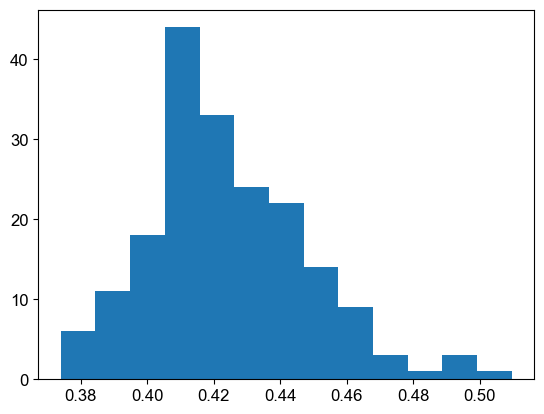

In [201]:
tmpsubsamp_2 = Raw_Unnorm_VesExt_9910_4[Raw_Unnorm_VesExt_9910_4["Group"] == 73]
plt.hist(tmpsubsamp_2["LAC Value"], bins = 13)

#173

In [9]:
tmpsubsamp_2

,X,Y,Z,Group,LAC Value
5965,160,259,190,73,0.402178
5966,160,259,191,73,0.425944
5967,160,259,192,73,0.417738
5979,160,260,190,73,0.425608
5980,160,260,191,73,0.429532
...,...,...,...,...,...
8645,170,259,196,73,0.415615
8646,170,260,194,73,0.409238
8647,170,260,195,73,0.403095
8648,170,260,196,73,0.413957


In [633]:
tmpsubsamp_2.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/Misc/subsamp_fig_2.csv", index = False)

(array([ 2.,  6., 13., 24., 20., 19.,  7.,  6.,  2.]),
 array([0.28495532, 0.29304659, 0.30113786, 0.30922914, 0.31732041,
        0.32541165, 0.33350292, 0.34159419, 0.34968546, 0.35777673]),
 <BarContainer object of 9 artists>)

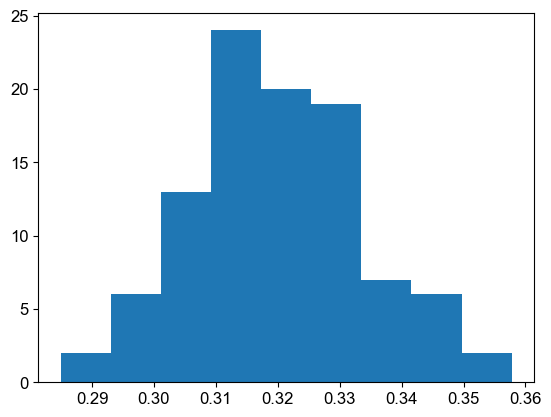

In [311]:
tmpsubsamp_3 = Raw_Unnorm_VesExt_9910_4[Raw_Unnorm_VesExt_9910_4["Group"] == 175]
plt.hist(tmpsubsamp_3["LAC Value"], bins = 9)

#41
#122
#131

In [312]:
tmpsubsamp_3.to_csv("D:/Downloads/Drug Stimulated INS1E Cells/Misc/subsamp_fig_3.csv", index = False)

**Plasma Membrane EDT**

In [9]:
#Visualizing 3D Euclidean Distance Transform 

binaryMem_9910_4 = openmrc(Ext_9910_4_class.membrane)
binaryMem_9910_4_true = np.where(binaryMem_9910_4 > 0, 1, 0)
Mem_dist_9910_4 = ndimage.distance_transform_edt(binaryMem_9910_4_true)
#rot_Mem_dist_9910_4 = np.rot90(Mem_dist_9910_4,2)

In [10]:
binaryMem_9910_4.shape

(479, 479, 479)

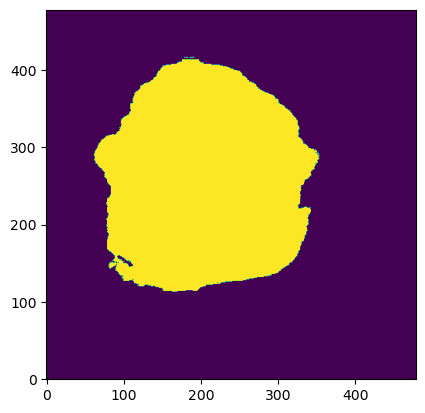

In [11]:
#plt.imshow(binaryMem_9910_4_true[200,:,:], cmap = "viridis")
#plt.gca().invert_yaxis()

#Note: y axis is weird here. It again is "flipped" (e.g. since 479-283 = 196, 196 corresponds to 283)
plt.imshow(binaryMem_9910_4_true[:,196,:], cmap = "viridis")
plt.gca().invert_yaxis()

plt.show()

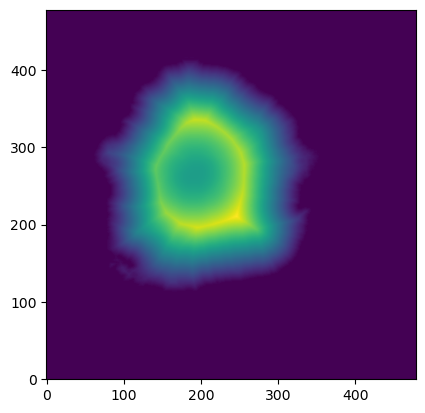

In [12]:
plt.imshow(Mem_dist_9910_4[:,196,:], cmap = "viridis")
plt.gca().invert_yaxis()

plt.show()

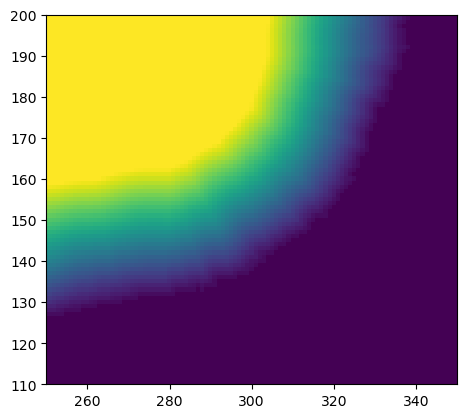

In [204]:
#set colormap values 
vmin_val = 0
vmax_val = 30

plt.imshow(Mem_dist_9910_4[:,196,:], cmap = "viridis", vmin = vmin_val, vmax = vmax_val)
plt.gca().invert_yaxis()  #make consistent with amira view
#plt.ylim(140,226)
#plt.xlim(240,330)

plt.ylim(110,200)
plt.xlim(250,350)
plt.show()

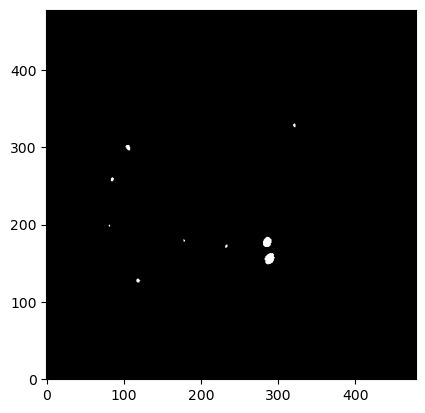

In [13]:
binaryVes_9910_4 = openmrc(Ext_9910_4_class.vesicles)
flip_binaryVes_9910_4 = np.flip(binaryVes_9910_4, axis = 1)  #make consistent with mrc file
plt.imshow(flip_binaryVes_9910_4[:,283,:], cmap = "gray")
plt.gca().invert_yaxis()

plt.show()

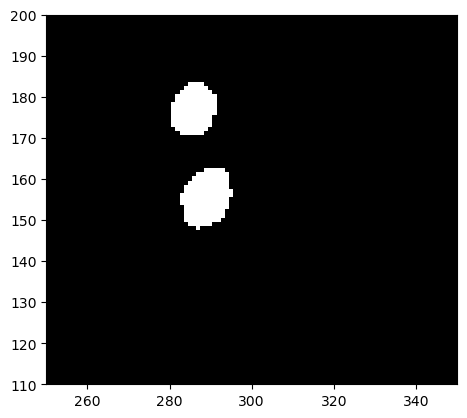

In [206]:
plt.imshow(flip_binaryVes_9910_4[:,283,:], cmap = "gray")
plt.gca().invert_yaxis()
#plt.ylim(140,226)
#plt.xlim(240,330)

plt.ylim(110,200)
plt.xlim(250,350)
plt.show()

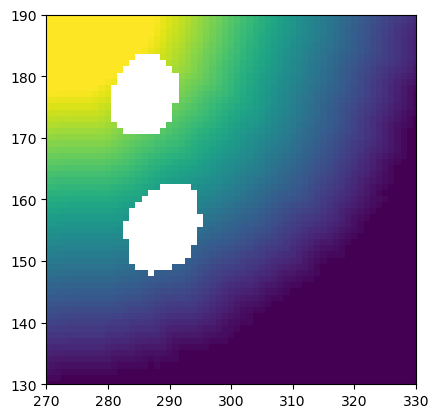

In [14]:
# Set colormap scaling values
vmin_val = 0
vmax_val = 45

# Plot the first image (background)
plt.imshow(Mem_dist_9910_4[:,196,:], cmap="viridis", vmin=vmin_val, vmax=vmax_val)

# Overlay the second image where 0 values are masked out 
masked_flip_binaryVes_9910_4 = np.ma.masked_where(flip_binaryVes_9910_4 == 0, flip_binaryVes_9910_4)
plt.imshow(masked_flip_binaryVes_9910_4[:,283,:], cmap="Greys", alpha=1)

plt.gca().invert_yaxis()  # Ensure the same axis inversion applies
# Maintain the same limits
plt.ylim(130,190)
plt.xlim(270,330)

plt.show()

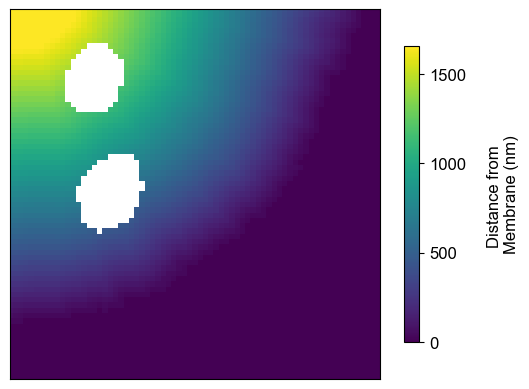

In [405]:
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first image (background) and store the image object
# Set colormap scaling values
vmin_val = 0
vmax_val = 50
im = ax.imshow(Mem_dist_9910_4[:,196,:], cmap="viridis", vmin=vmin_val, vmax=vmax_val)

# Overlay the second image with masked zeros
masked_flip_binaryVes_9910_4 = np.ma.masked_where(flip_binaryVes_9910_4 == 0, flip_binaryVes_9910_4)
ax.imshow(masked_flip_binaryVes_9910_4[:,283,:], cmap="Greys", alpha=1)

# Invert y-axis and set limits for consistency
ax.invert_yaxis()
ax.set_ylim(120, 190)
ax.set_xlim(270, 340)

# Add a colorbar for the viridis image
cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
cbar.set_label("Distance from \nMembrane (nm)", labelpad=15)  # Optionally label the colorbar
#custom ticks/colorbar
custom_ticks = [0, 15.10, 30.21, 45.32]
custom_labels = ["0", "500", "1000", "1500"]
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_labels)

#Create title
#ax.set_title("Euclidean Distance Transform of \nMembrane overlayed onto ISGs", fontsize = 18, pad = 10, loc = "left", fontweight = "bold")
#remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

fig.savefig("distance_from_membrane.png", dpi=600, bbox_inches='tight')

plt.show()


In [45]:
#Raw Image processing

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


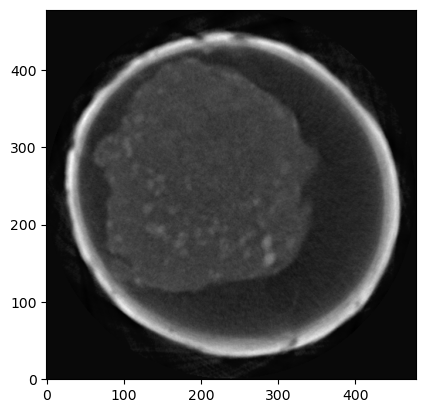

In [46]:
LAC_9910_4 = openmrc(Ext_9910_4_class.LACFile) * (Ext_9910_4_class.LACfactor)
LAC_9910_4.shape

plt.imshow(LAC_9910_4[:,196,:], cmap = "gray")
plt.gca().invert_yaxis()

plt.show()

In [219]:
#bilateral filter image
filtered_9910_4 = cv2.bilateralFilter(LAC_9910_4[:,196,:], d=5, sigmaColor=20, sigmaSpace=20)


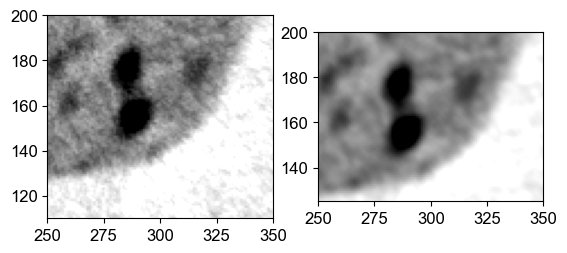

In [340]:
#set colormap values 
vmin_LAC = 0.1
vmax_LAC = 0.4

plt.subplot(1, 2, 1)
plt.imshow(LAC_9910_4[:,196,:], cmap = "gray_r", 
           vmin = vmin_LAC, vmax = vmax_LAC
          )
plt.gca().invert_yaxis()  #make consistent with amira view
plt.ylim(110,200)
plt.xlim(250,350)


plt.subplot(1, 2, 2)
plt.imshow(filtered_9910_4, cmap = "gray_r", 
           vmin = vmin_LAC, vmax = vmax_LAC
          )
plt.gca().invert_yaxis()  #make consistent with amira view
plt.ylim(125,200)
plt.xlim(250,350)

plt.show()

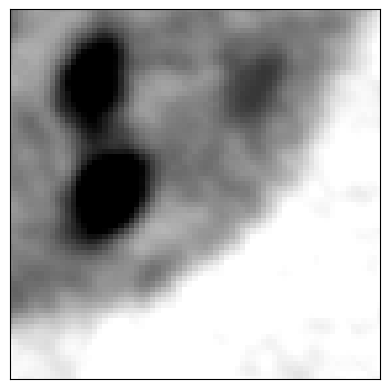

In [404]:
plt.imshow(filtered_9910_4, cmap = "gray_r", 
           vmin = vmin_LAC, vmax = vmax_LAC
          )
plt.gca().invert_yaxis()  #make consistent with amira view
plt.ylim(120, 190)
plt.xlim(270, 340)

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.savefig("raw_distance_from_membrane.png", dpi=600, bbox_inches='tight')

plt.show()

**Mitochondria Distance**

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


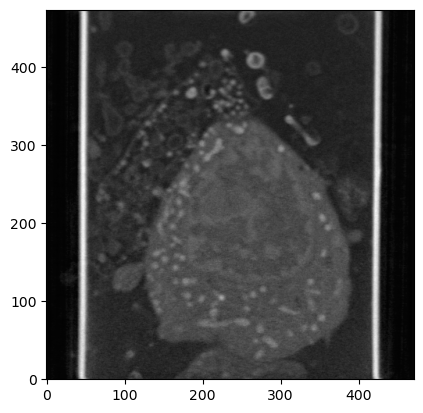

In [7]:
LAC_9911_2 = openmrc(Ext_9911_2_class.LACFile) * (Ext_9911_2_class.LACfactor)
LAC_9911_2.shape

plt.imshow(LAC_9911_2[266,:,:], cmap = "gray")
plt.gca().invert_yaxis()

plt.show()

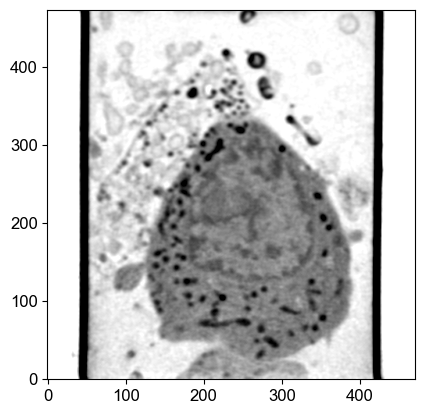

In [26]:
#set colormap values 
vmin_LAC = 0.1
vmax_LAC = 0.4

filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[266,:,:], d=5, sigmaColor=20, sigmaSpace=20)
#filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[200,:,:], d=5, sigmaColor=20, sigmaSpace=20)



plt.imshow(filtered_9911_2, cmap = "gray_r",
          vmin = vmin_LAC, vmax = vmax_LAC)
plt.gca().invert_yaxis()



plt.show()

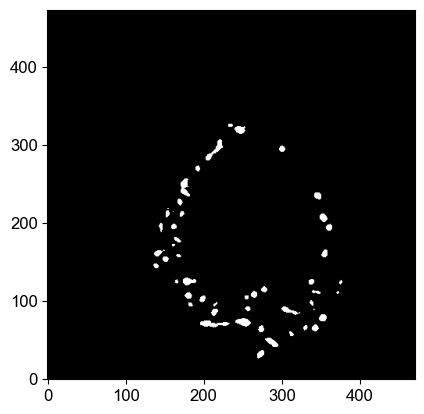

In [14]:
Mito_9911_2 = openmrc(Ext_9911_2_class.mitochondria)
plt.imshow(Mito_9911_2[266,:,:], cmap = "gray")
plt.gca().invert_yaxis()

#plt.ylim(250,340)
#plt.xlim(150,235)

plt.show()

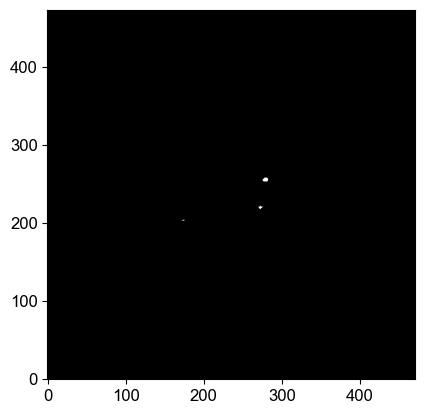

In [15]:
Ves_9911_2 = openmrc(Ext_9911_2_class.vesicles)
plt.imshow(Ves_9911_2[120,:,:], cmap = "gray")
plt.gca().invert_yaxis()


 

plt.show()

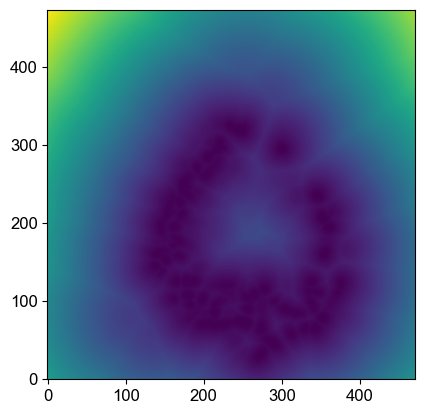

In [16]:
binaryMito_9911_2_true_invert = 1-(np.where(Mito_9911_2 > 0, 1, 0))
binaryMito_9911_2 = ndimage.distance_transform_edt(binaryMito_9911_2_true_invert)

plt.imshow(binaryMito_9911_2[266,:,:], cmap = "viridis")
plt.gca().invert_yaxis()

plt.show()

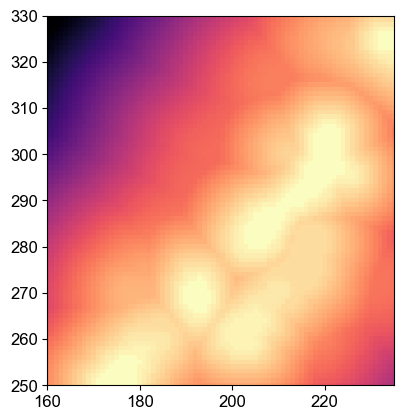

In [36]:
vmin_dist = 0
vmax_dist = 45

plt.imshow(binaryMito_9911_2[266,:,:], cmap = "magma_r", vmin = vmin_dist, vmax = vmax_dist)
plt.gca().invert_yaxis()

plt.ylim(250,330)
plt.xlim(160,235)

plt.show()

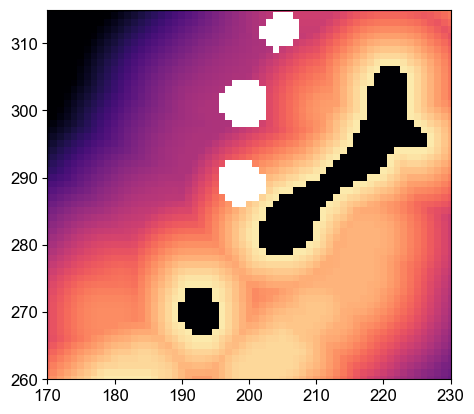

In [17]:
# Set colormap scaling values
vmin_dist = 0
vmax_dist = 25

# Plot the first image (background)
plt.imshow(binaryMito_9911_2[265,:,:], cmap = "magma_r", vmin = vmin_dist, vmax = vmax_dist)

# Overlay the second image where 0 values are masked out(mitochondira)
masked_Mito_9911_2 = np.ma.masked_where(Mito_9911_2 == 0, Mito_9911_2)
plt.imshow(masked_Mito_9911_2[265,:,:], cmap="magma", alpha=1)

#Overlay next image where 0 values masked out (vesicles)
masked_Ves_9911_2 = np.ma.masked_where(Ves_9911_2 == 0, Ves_9911_2)
plt.imshow(masked_Ves_9911_2[265,:,:], cmap="Greys", alpha=1)

plt.gca().invert_yaxis()  # Ensure the same axis inversion applies
# Maintain the same limits
plt.ylim(260,315)
plt.xlim(170,230)

plt.show()

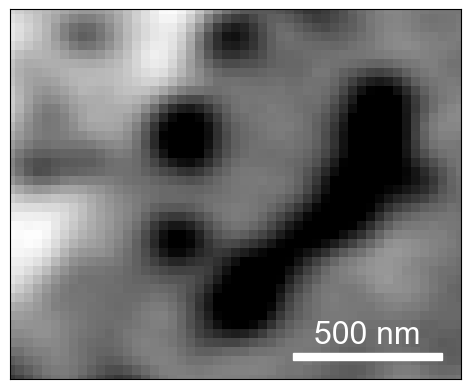

In [171]:
#font
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(filtered_9911_2, cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
ax.invert_yaxis()

#Define limits and remove ticks
ax.set_ylim(274, 315)
ax.set_xlim(180, 230)
ax.set_xticks([])
ax.set_yticks([])


#scalebar atributes
scale_pixel_length = 16.44 #number of pixels for scalebar 
#30.40 nm resolution size

scale_label = '500 nm' 

# Add scale bar
fontprops = fm.FontProperties(size=23)
scalebar = AnchoredSizeBar(ax.transData,
                           scale_pixel_length, scale_label, 'lower right',
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.8,
                           fontproperties=fontprops,
                          label_top=True)

ax.add_artist(scalebar)

#plt.savefig("raw_distance_from_mito_scale_02.png", dpi=1000, bbox_inches='tight')

plt.show()

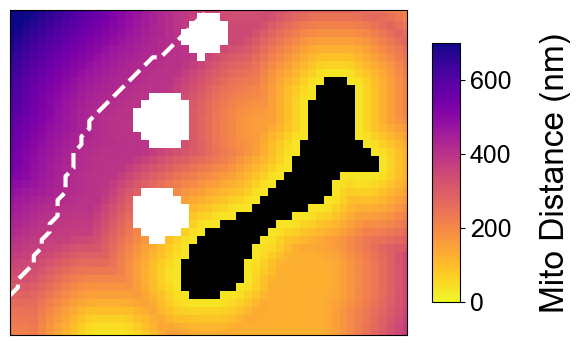

In [169]:
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first image (background)
# Set colormap scaling values
vmin_dist = 0
vmax_dist = 23
im = ax.imshow(binaryMito_9911_2[265,:,:], cmap = "plasma_r", vmin = vmin_dist, vmax = vmax_dist)

# Overlay the second image where 0 values are masked out(mitochondira)
ax.imshow(masked_Mito_9911_2[265,:,:], cmap="Greys_r", alpha=1)

#Overlay next image where 0 values masked out (vesicles)
ax.imshow(masked_Ves_9911_2[265,:,:], cmap="Greys", alpha=1)

#overlay membrane
for c in contour_arrays:
    ax.plot(c[:, 0], c[:, 1], linestyle='--', linewidth=3, color='white')

# Invert y-axis and set limits for consistency
ax.invert_yaxis()
ax.set_ylim(274, 315)
ax.set_xlim(180, 230)


# Add a colorbar for the viridis image
cbar = fig.colorbar(im, ax=ax, shrink=0.7, aspect=9)
cbar.set_label("Mito Distance (nm)", labelpad=20, fontsize = 24)  # Optionally label the colorbar
#cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
#cbar.set_label("Distance from Mitochondria (nm)", labelpad=20)  # Optionally label the colorbar

#custom ticks/colorbar. Resolution of this cell is 30.40 nm 
custom_ticks_mito = [0, 6.58, 13.15, 19.73]
custom_labels_mito = ["0", "200", "400", "600"]
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(custom_ticks_mito)
cbar.set_ticklabels(custom_labels_mito)

#Create title
#ax.set_title("Inverse Euclidean Distance \nTransform of Mitochondria \noverlayed onto ISGs", fontsize = 18, pad = 10, loc = "left", fontweight = "bold")
#remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#fig.savefig("distance_from_mito_big_02.png", dpi=1000, bbox_inches='tight')

plt.show()


In [416]:
#binary membrane mask for 9911_2

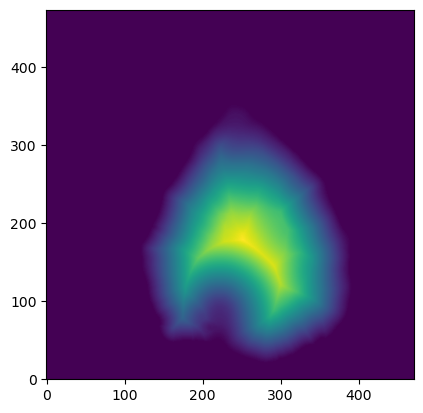

In [18]:
binaryMem_9911_2= openmrc(Ext_9911_2_class.membrane)
binaryMem_9911_2_true = np.where(binaryMem_9911_2 > 0, 1, 0)
Mem_dist_9911_2 = ndimage.distance_transform_edt(binaryMem_9911_2_true)

plt.imshow(Mem_dist_9911_2[266,:,:], cmap = "viridis")
plt.gca().invert_yaxis()

plt.show()

(180.0, 230.0)

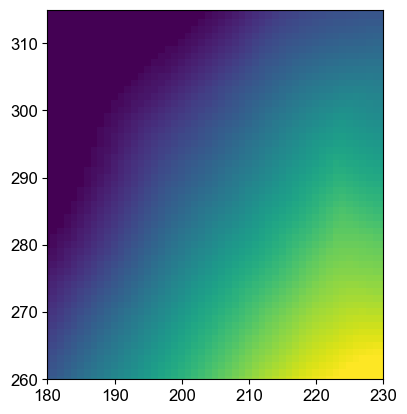

In [11]:
plt.imshow(Mem_dist_9911_2[266,:,:], cmap = "viridis", vmin = 0, vmax = 40)
plt.gca().invert_yaxis()

plt.ylim(260,315)
plt.xlim(180,230)

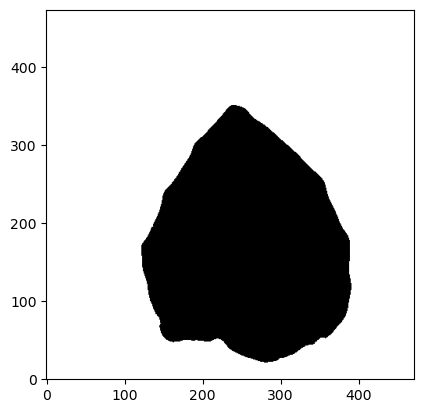

In [21]:
#PM Mask Outline

plt.imshow(binaryMem_9911_2_true[266,:,:], cmap = "gray_r")
plt.gca().invert_yaxis()



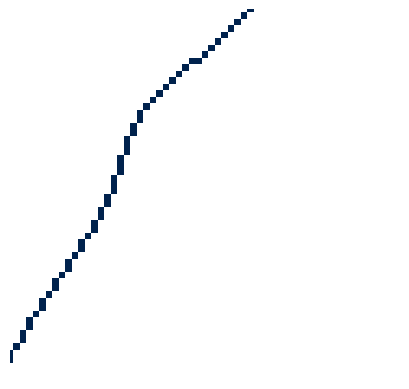

In [28]:
binary_PM = (binaryMem_9911_2_true[266,:,:] * 255).astype(np.uint8)

# Find contours
contoursPM, _ = cv2.findContours(binary_PM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a blank canvas
border_PM = np.zeros_like(binary_PM)
cv2.drawContours(border_PM, contoursPM, -1, 255, 1)  # 1 px thick border

#remove of zeros
masked_border_PM = np.ma.masked_where(border_PM == 0, border_PM)

# Display
plt.imshow(masked_border_PM, cmap='cividis')
plt.gca().invert_yaxis()
plt.ylim(260, 317)
plt.xlim(170, 230)
plt.axis('off')
plt.show()


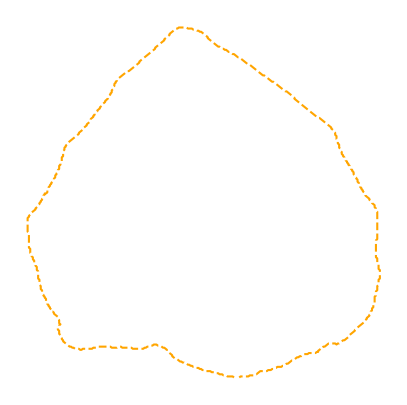

In [21]:
# Binary mask preparation (your code)
binary_PM = (binaryMem_9911_2_true[266, :, :] * 255).astype(np.uint8)

# Find contours
contoursPM, _ = cv2.findContours(binary_PM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert contours to list of (N, 2) arrays
contour_arrays = []
for contour in contoursPM:
    c = contour.squeeze()
    if c.ndim == 1:  # Skip single-point contours
        continue
    contour_arrays.append(c)

    
fig, ax = plt.subplots(figsize=(5, 5))
for c in contour_arrays:
    ax.plot(c[:, 0], c[:, 1], linestyle='--', linewidth=1.5, color='orange')
ax.axis('off')
plt.show()

In [195]:
contoursPM

(array([[[279,  21]],
 
        [[278,  22]],
 
        [[274,  22]],
 
        [[273,  23]],
 
        [[271,  23]],
 
        [[270,  24]],
 
        [[268,  24]],
 
        [[267,  25]],
 
        [[265,  25]],
 
        [[264,  26]],
 
        [[262,  26]],
 
        [[261,  27]],
 
        [[258,  27]],
 
        [[257,  28]],
 
        [[255,  28]],
 
        [[254,  29]],
 
        [[253,  29]],
 
        [[252,  30]],
 
        [[250,  30]],
 
        [[249,  31]],
 
        [[248,  31]],
 
        [[247,  32]],
 
        [[246,  32]],
 
        [[245,  33]],
 
        [[244,  33]],
 
        [[243,  34]],
 
        [[242,  34]],
 
        [[241,  35]],
 
        [[240,  35]],
 
        [[239,  36]],
 
        [[238,  36]],
 
        [[236,  38]],
 
        [[235,  38]],
 
        [[232,  41]],
 
        [[232,  42]],
 
        [[228,  46]],
 
        [[228,  47]],
 
        [[226,  49]],
 
        [[225,  49]],
 
        [[223,  51]],
 
        [[221,  51]],
 
        [[220,  

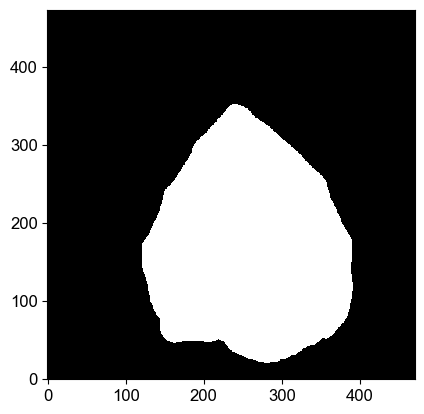

In [22]:
binaryMem_9911_2_true
masked_Mem_9911_2 = np.ma.masked_where(binaryMem_9911_2_true == 1, binaryMem_9911_2_true)

plt.imshow(masked_Mem_9911_2[266,:,:], cmap = "gray")
plt.gca().invert_yaxis()

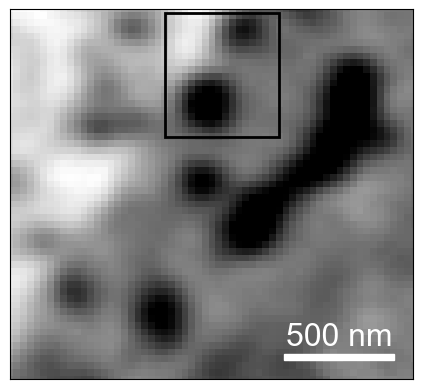

In [88]:
#font
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(filtered_9911_2, cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
ax.invert_yaxis()

#Define limits and remove ticks
ax.set_ylim(260, 315)
ax.set_xlim(170, 230)
ax.set_xticks([])
ax.set_yticks([])

#Rectangle for PM Membrane
rectangle = patches.Polygon(
    [[193, 296], [193, 314.5], [210, 314.5], [210, 296]],  # data coords (x, y)
    closed=True,
    transform=ax.transData,
    facecolor='none',         # transparent fill
    edgecolor='black',        # white outline
    linewidth=2 
)
ax.add_patch(rectangle)

#scalebar atributes
scale_pixel_length = 16.44 #number of pixels for scalebar 
#30.40 nm resolution size

scale_label = '500 nm' 

# Add scale bar
fontprops = fm.FontProperties(size=23)
scalebar = AnchoredSizeBar(ax.transData,
                           scale_pixel_length, scale_label, 'lower right',
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.8,
                           fontproperties=fontprops,
                          label_top=True)

ax.add_artist(scalebar)

#plt.savefig("raw_distance_from_mito_scale_whitebox.png", dpi=1000, bbox_inches='tight')

plt.show()

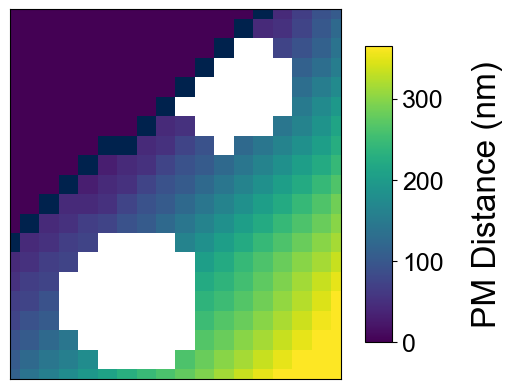

In [38]:
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first image (background) and store the image object
# Set colormap scaling values
vmin_val_2 = 0
vmax_val_2 = 12
im = ax.imshow(Mem_dist_9911_2[266,:,:], cmap="viridis", vmin=vmin_val_2, vmax=vmax_val_2)

# Overlay the second image with masked zeros
ax.imshow(masked_Ves_9911_2[265,:,:], cmap="Greys", alpha=1)

#Overlay border of PM (masked)
ax.imshow(masked_border_PM, cmap="cividis", alpha=1)


# Invert y-axis and set limits for consistency
ax.invert_yaxis()
#ax.set_ylim(260, 317)
#ax.set_xlim(170, 230)
ax.set_ylim(297, 316)
ax.set_xlim(193, 210)

# Add a colorbar for the viridis image. Res is 30.40 nm
cbar = fig.colorbar(im, ax=ax, shrink = 0.8, aspect = 11)
cbar.set_label("PM Distance (nm)", labelpad=20, fontsize = 24)  # Optionally label the colorbar
#cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
#cbar.set_label("Distance from Membrane (nm)", labelpad=15)  # Optionally label the colorbar

#custom ticks/colorbar
custom_ticks = [0, 3.29, 6.58, 9.87]
custom_labels = ["0", "100", "200", "300"]
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_labels)

#Create title
#ax.set_title("Euclidean Distance Transform of \nMembrane overlayed onto ISGs", fontsize = 18, pad = 10, loc = "left", fontweight = "bold")
#remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#fig.savefig("zoomin_DockedISG.png", dpi=1000, bbox_inches='tight')

plt.show()

(array([1.04692016e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.03780000e+05,
        0.00000000e+00, 1.56838000e+05]),
 array([0.        , 0.14142136, 0.28284271, 0.42426407, 0.56568542,
        0.70710678, 0.84852814, 0.98994949, 1.13137085, 1.27279221,
        1.41421356]),
 <BarContainer object of 10 artists>)

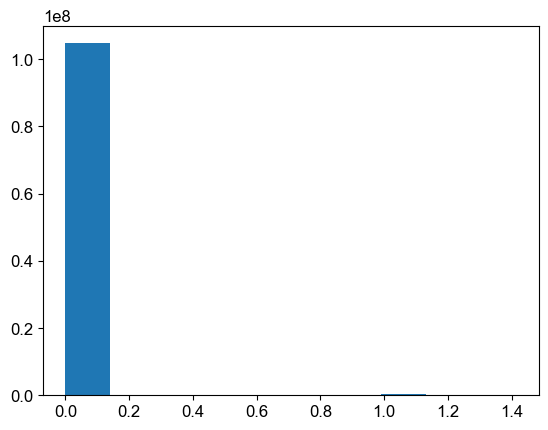

In [92]:
#if distance is greater than 50 nm, remove it from matrix with np.where
#30.4 nm per pixel (1.65 voxels for less than 50nm distance from PM)
Cond_9911_2_mat = np.where(Mem_dist_9911_2 <= 1.65, Mem_dist_9911_2, 0)
plt.hist(Cond_9911_2_mat.flatten())

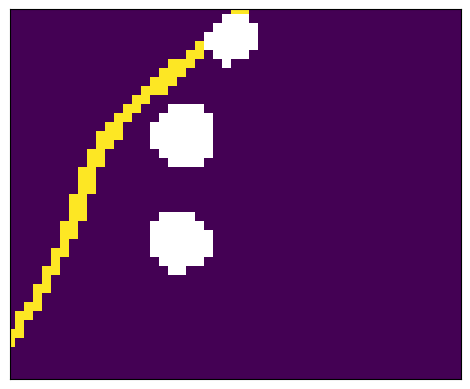

In [93]:
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first image (background) and store the image object
# Set colormap scaling values
vmin_val_2 = 0
vmax_val_2 = 1
im = ax.imshow(Cond_9911_2_mat[266,:,:], cmap="viridis", vmin=vmin_val_2, vmax=vmax_val_2)

# Overlay the second image with masked zeros
ax.imshow(masked_Ves_9911_2[265,:,:], cmap="Greys", alpha=1)

#Overlay the membrane 
#plt.imshow(masked_border_PM, cmap="Greys")
#for c in contour_arrays:
#    ax.plot(c[:, 0], c[:, 1], linestyle='--', linewidth=1.8, color='black')


# Invert y-axis and set limits for consistency
ax.invert_yaxis()

#ax.set_ylim(260, 315)
#ax.set_xlim(170, 230)

#ax.set_ylim(297, 316)
#ax.set_xlim(193, 210)

ax.set_ylim(274, 315)
ax.set_xlim(180, 230)


# Add a colorbar for the viridis image. Res is 30.40 nm
#cbar = fig.colorbar(im, ax=ax, shrink = 0.8, aspect = 11)
#cbar.set_label("PM Distance (nm)", labelpad=20, fontsize = 24)  # Optionally label the colorbar
#cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
#cbar.set_label("Distance from Membrane (nm)", labelpad=15)  # Optionally label the colorbar

#custom ticks/colorbar
#custom_ticks = [0, 3.29, 6.58, 9.87]
#custom_labels = ["0", "100", "200", "300"]
#cbar.ax.tick_params(labelsize=18)
#cbar.set_ticks(custom_ticks)
#cbar.set_ticklabels(custom_labels)

#Create title
#ax.set_title("Euclidean Distance Transform of \nMembrane overlayed onto ISGs", fontsize = 18, pad = 10, loc = "left", fontweight = "bold")
#remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#fig.savefig("DockedISG_binary.png", dpi=1000, bbox_inches='tight')

plt.show()

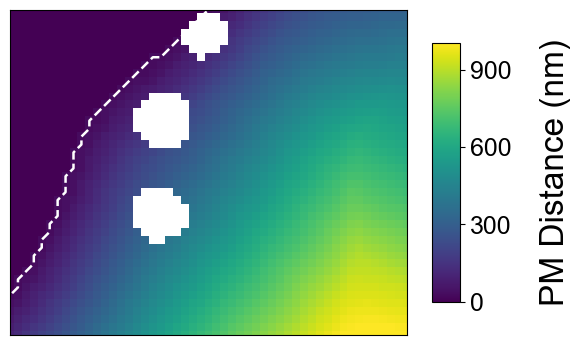

In [176]:
# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
mpl.rcParams['font.size'] = 12  # Increase base font size

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first image (background) and store the image object
# Set colormap scaling values
vmin_val_2 = 0
vmax_val_2 = 33
im = ax.imshow(Mem_dist_9911_2[266,:,:], cmap="viridis", vmin=vmin_val_2, vmax=vmax_val_2)

# Overlay the second image with masked zeros
ax.imshow(masked_Ves_9911_2[265,:,:], cmap="Greys", alpha=1)

#Overlay the membrane 
#plt.imshow(masked_border_PM, cmap="Greys")
for c in contour_arrays:
    ax.plot(c[:, 0], c[:, 1], linestyle='--', linewidth=1.8, color='white')

# Invert y-axis and set limits for consistency
ax.invert_yaxis()
ax.set_ylim(274, 315)
ax.set_xlim(180, 230)


# Add a colorbar for the viridis image. Res is 30.40 nm
cbar = fig.colorbar(im, ax=ax, shrink = 0.7, aspect = 9)
cbar.set_label("PM Distance (nm)", labelpad=20, fontsize = 24)  # Optionally label the colorbar
#cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
#cbar.set_label("Distance from Membrane (nm)", labelpad=15)  # Optionally label the colorbar

#custom ticks/colorbar
custom_ticks = [0, 9.87, 19.74, 29.60,]
custom_labels = ["0", "300", "600", "900",]
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_labels)

#Create title
#ax.set_title("Euclidean Distance Transform of \nMembrane overlayed onto ISGs", fontsize = 18, pad = 10, loc = "left", fontweight = "bold")
#remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#fig.savefig("distance_from_membrane_2_big_02.png", dpi=1000, bbox_inches='tight')

plt.show()

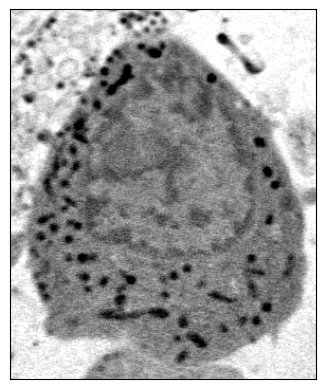

In [427]:
#visualizing whole cell of 9911_2
plt.imshow(LAC_9911_2[266,:,:], cmap = "gray_r", vmin = vmin_LAC, vmax = vmax_LAC)
plt.gca().invert_yaxis()

plt.ylim(10,360)
plt.xlim(110,400)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

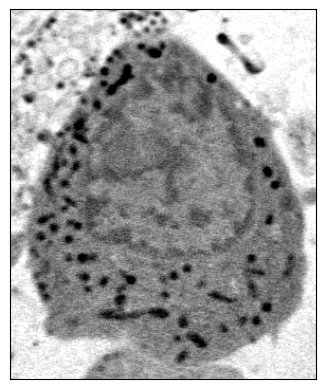

In [564]:
#visualizing whole cell of 9911_2
plt.imshow(LAC_9911_2[266,:,:], cmap = "gray_r", vmin = vmin_LAC, vmax = vmax_LAC)
plt.gca().invert_yaxis()

plt.ylim(10,360)
plt.xlim(110,400)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

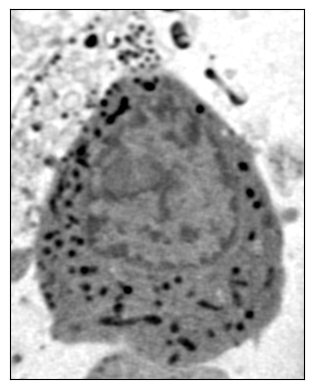

In [193]:
#Filtered whole cell of 9911_2. Find different appropriate slices to look at

#whole_filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[300,:,:], d=5, sigmaColor=20, sigmaSpace=20)
#whole_filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[200,:,:], d=5, sigmaColor=20, sigmaSpace=20)
whole_filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[266,:,:], d=5, sigmaColor=20, sigmaSpace=20)

fig, ax = plt.subplots()
plt.imshow(whole_filtered_9911_2, cmap = "gray_r", 
           vmin = vmin_LAC, vmax = vmax_LAC, 
           alpha = 1)

plt.gca().invert_yaxis()

#X/Y limits and omits tick marks
plt.ylim(10,400)
plt.xlim(100,410)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#fig.savefig("9911_2_266alpha_01_noback_zstack.png", dpi=1000, bbox_inches='tight', pad_inches = 0)

plt.show()

In [194]:
LAC_9911_2.shape
#ylim is from 10 to 400, resolution is 30.40 nm. 30.40 x 390 = 11,858 or 11.86 um 

(471, 474, 471)

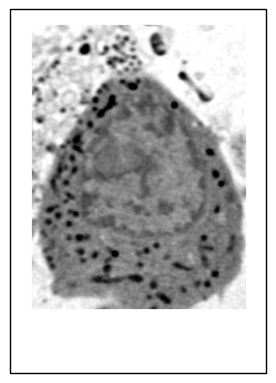

In [607]:
#Filtered whole cell of 9911_2
whole_filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[266,:,:], d=5, sigmaColor=20, sigmaSpace=20)

fig, ax = plt.subplots()
plt.imshow(whole_filtered_9911_2, cmap = "gray_r", 
           vmin = vmin_LAC, vmax = vmax_LAC, 
           alpha = 1)

plt.gca().invert_yaxis()

#X/Y limits and omits tick marks
#plt.ylim(0,400)
plt.ylim(15,415)
plt.xlim(100,410)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# Set white inner spines
for spine in ax.spines.values():
    spine.set_linewidth(20)
    spine.set_edgecolor("white")

# Adjust subplot to create Polaroid-like border
#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)
plt.subplots_adjust(left=0.00, right=0.80, top=0.95, bottom=0.3)

# Add black rectangle
rect = patches.Rectangle(
    (bbox.x0, bbox.y0),
    #width=bbox.width,
    width=0.4,
    height=bbox.height,
    linewidth=1.0,
    edgecolor='black',
    facecolor='none',
    transform=fig.transFigure,
    zorder=10  # Make sure it draws on top
)
fig.patches.append(rect)

#fig.savefig("9911_2_266alpha_02.png", dpi=1000, bbox_inches='tight')

plt.show()

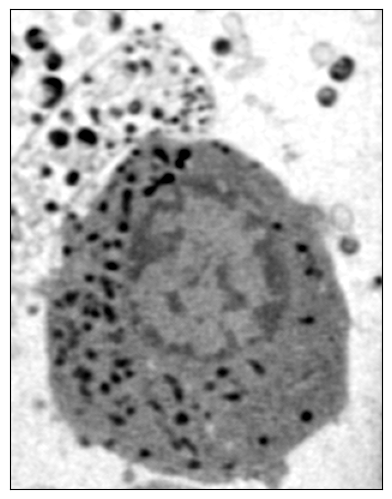

In [53]:
#Filtered whole cell of 9911_2
whole_filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[282,:,:], d=5, sigmaColor=20, sigmaSpace=20)

fig, ax = plt.subplots()
plt.imshow(whole_filtered_9911_2, cmap = "gray_r", 
           vmin = 0.1, vmax = 0.4, 
           alpha = 1)

plt.gca().invert_yaxis()

#X/Y limits and omits tick marks
#plt.ylim(0,400)
plt.ylim(15,415)
plt.xlim(100,410)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#remove white parts 
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

#fig.savefig("9911_2_282alpha_01_noback.png", dpi=1000, bbox_inches='tight', pad_inches=0)


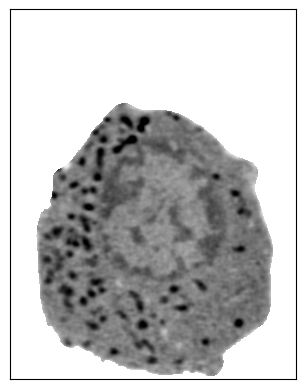

In [55]:
# Plot the first image (LAC Image)
plt.imshow(whole_filtered_9911_2, cmap = "gray_r", 
           vmin = 0.1, vmax = 0.4, 
           alpha = 1)

# Overlay the second image where 1 values are masked out(PM)
masked_Mem_9911_2 = np.ma.masked_where(binaryMem_9911_2_true == 1, binaryMem_9911_2_true)

#Overlay next image where 0 values masked out (PM)
plt.imshow(masked_Mem_9911_2[282,:,:], cmap="Greys", alpha=1)

plt.gca().invert_yaxis()  # Ensure the same axis inversion applies
# Maintain the same limits
plt.ylim(15,415)
plt.xlim(100,410)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#plt.savefig("9911_2_282alpha_01_removeback.png", dpi=1000, bbox_inches='tight', pad_inches=0)

plt.show()

In [540]:
bbox.height

0.7575000000000001

In [537]:
bbox.width

0.6021153846153847

## 4 Plots for LAC Value ## 

(160.0, 200.0)

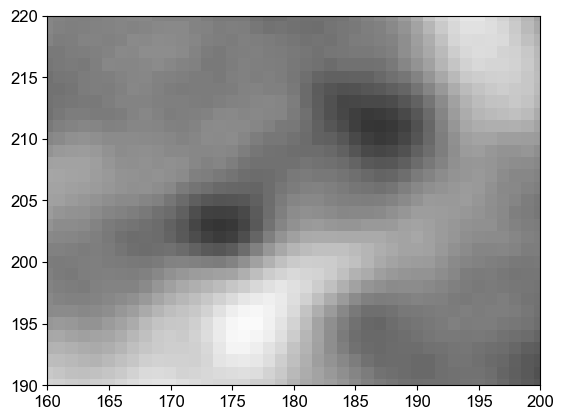

In [30]:
#set colormap values 
vmin_LAC = 0.1
vmax_LAC = 0.4

#filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[266,:,:], d=5, sigmaColor=20, sigmaSpace=20)
#filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[260,:,:], d=5, sigmaColor=20, sigmaSpace=20)
#filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[230,:,:], d=5, sigmaColor=20, sigmaSpace=20)
filtered_9911_2 = cv2.bilateralFilter(LAC_9911_2[120,:,:], d=5, sigmaColor=20, sigmaSpace=20)


plt.imshow(filtered_9911_2, cmap = "gray_r",
          vmin = vmin_LAC, vmax = vmax_LAC)
plt.gca().invert_yaxis()


#0.4, slice 230
#plt.ylim(410,440)
#plt.xlim(250,280)

#0.3, slice 230
#plt.ylim(50,80)
#plt.xlim(260,290)

#0.3, slice 180
#plt.ylim(250,350)
#plt.xlim(300,350)

#0.1, slice 120
plt.ylim(190,220)
plt.xlim(160,200)

#0.2, slice is 120
#plt.ylim(200,230)
#plt.xlim(260,285)

#plt.gca().set_xticks([])
#plt.gca().set_yticks([])


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


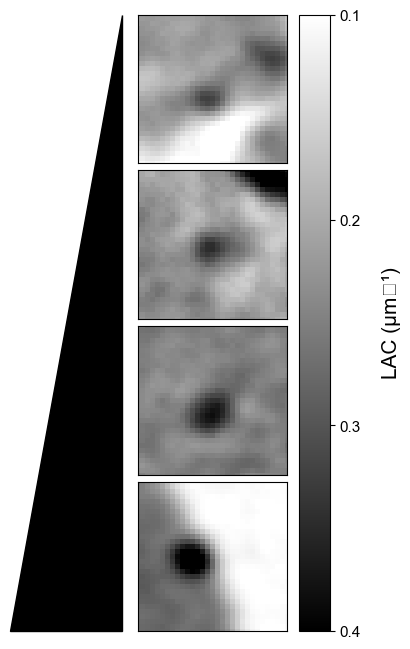

In [315]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 8))

#Create z stacks slices
filtered_9911_2_z120 = cv2.bilateralFilter(LAC_9911_2[120,:,:], d=5, sigmaColor=20, sigmaSpace=20)
filtered_9911_2_z230 = cv2.bilateralFilter(LAC_9911_2[230,:,:], d=5, sigmaColor=20, sigmaSpace=20)

#First (0.1)
im1 = axs[0].imshow(filtered_9911_2_z120, cmap = "gray_r",
          vmin = .15, vmax = vmax_LAC)
axs[0].set_xlim(160, 190)
axs[0].set_ylim(190, 220)
axs[0].set_xticks([])
axs[0].set_yticks([])

#Second (0.2)
im1 = axs[1].imshow(filtered_9911_2_z120, cmap = "gray_r",
          vmin = .2, vmax = 0.38)
axs[1].set_xlim(258, 288)
axs[1].set_ylim(205, 235)
axs[1].set_xticks([])
axs[1].set_yticks([])

#Third (0.3)
im1 = axs[2].imshow(filtered_9911_2_z230, cmap = "gray_r",
          vmin = vmin_LAC, vmax = vmax_LAC)
axs[2].set_xlim(260, 290)
axs[2].set_ylim(50, 80)
axs[2].set_xticks([])
axs[2].set_yticks([])

#Fourth (0.4)
im1 = axs[3].imshow(filtered_9911_2_z230, cmap = "gray_r",
          vmin = vmin_LAC, vmax = vmax_LAC)
axs[3].set_xlim(250, 280)
axs[3].set_ylim(410, 440)
axs[3].set_xticks([])
axs[3].set_yticks([])

plt.subplots_adjust(hspace=0.05) 

# Add a single colorbar that spans all subplots
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', 
                    fraction=0.05, pad=0.02)
cbar.ax.invert_yaxis()
cbar.set_label("LAC (µm⁻¹)", size = 15, labelpad = 15)
cbar.ax.tick_params(labelsize=11)
cbar.set_ticks(np.linspace(0.1, 0.4, 4))

import matplotlib.patches as patches
triangle = patches.Polygon(
    [[0.5, 0.11], [0.64, 0.11], [0.64, 0.88]],  # triangle vertices in fig coords (x, y)
    closed=True,
    transform=fig.transFigure,
    color = "black",
)
fig.patches.append(triangle)


plt.show()

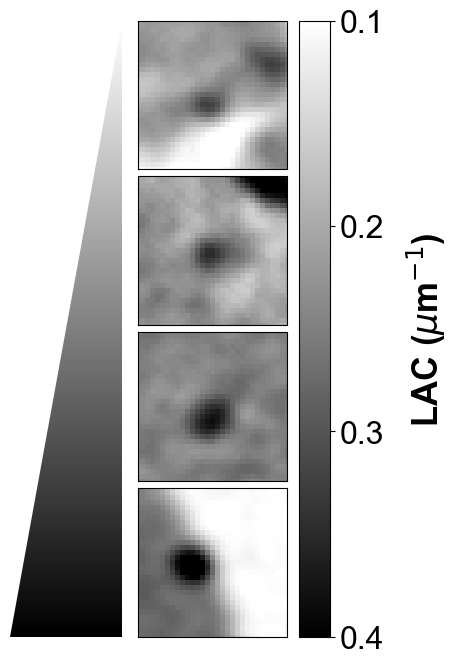

In [425]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# Set default font to sans-serif (ggplot's default "sans" style)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']  # Fallback sequence
#mpl.rcParams['font.size'] = 12  # Increase base font size

# Create subplots for your main images.
fig, axs = plt.subplots(4, 1, figsize=(8, 8))

# Create z-stack slices (example using cv2 bilateralFilter)
filtered_9911_2_z120 = cv2.bilateralFilter(LAC_9911_2[120, :, :], d=5, sigmaColor=20, sigmaSpace=20)
filtered_9911_2_z230 = cv2.bilateralFilter(LAC_9911_2[230, :, :], d=5, sigmaColor=20, sigmaSpace=20)

# First subplot (0.1)
im1 = axs[0].imshow(filtered_9911_2_z120, cmap="gray_r", vmin=0.15, vmax=vmax_LAC)
axs[0].set_xlim(160, 190)
axs[0].set_ylim(190, 220)
axs[0].set_xticks([])
axs[0].set_yticks([])

# Second subplot (0.2)
im1 = axs[1].imshow(filtered_9911_2_z120, cmap="gray_r", vmin=0.2, vmax=0.38)
axs[1].set_xlim(258, 288)
axs[1].set_ylim(205, 235)
axs[1].set_xticks([])
axs[1].set_yticks([])

# Third subplot (0.3)
im1 = axs[2].imshow(filtered_9911_2_z230, cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
axs[2].set_xlim(260, 290)
axs[2].set_ylim(50, 80)
axs[2].set_xticks([])
axs[2].set_yticks([])

# Fourth subplot (0.4)
im1 = axs[3].imshow(filtered_9911_2_z230, cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
axs[3].set_xlim(250, 280)
axs[3].set_ylim(410, 440)
axs[3].set_xticks([])
axs[3].set_yticks([])
plt.subplots_adjust(hspace=0.05)


#scalebar adjustment ---------------------------------------------------------------------------------------------
# Add scale bar to each subplot
scale_pixel_length_gall = 9.86  # number of pixels corresponding to 500 nm
scale_label_gall = ''

#scale_label_gall = '300 nm'
#scale_pixel_length_gall = 16.45  # number of pixels corresponding to 500 nm
#scale_label_gall = '500 nm'

#fontprops_gall = fm.FontProperties(size=19)

#scalebar_gall = AnchoredSizeBar(axs[0].transData,
#                           scale_pixel_length_gall,
#                           scale_label_gall,
#                           loc = 'upper left',
#                           pad=0.2,
#                           color='white',
#                           frameon=False,
#                           size_vertical=0.8,
#                           fontproperties=fontprops_gall,
#                           label_top=True,
#                               )
#axs[0].add_artist(scalebar_gall)


# Add a single colorbar that spans all subplots--------------------------------------------------------------------------
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label(r"LAC ($\mu$m$^{-1}$)", labelpad=15, fontsize = 25, weight = 'bold')
#cbar.set_label(r"LAC ($\mu$m$^{-1}$)", size=15, labelpad=15)
cbar.ax.invert_yaxis()
cbar.ax.tick_params(labelsize=23)
#cbar.ax.tick_params(labelsize=11)
cbar.set_ticks(np.linspace(0.1, 0.4, 4))

# --- Create the gradient-filled triangle with inverse gradient -------------------------------------------------------------

# Instead of drawing a uniform-colored triangle, create an inset axes covering the triangle's bounding box.
# Original triangle vertices: [[0.5, 0.11], [0.64, 0.11], [0.64, 0.88]]
# Bounding box: left=0.5, bottom=0.11, width=0.14, height=0.77.
triangle_ax = fig.add_axes([0.5, 0.11, 0.14, 0.77], zorder=10)
triangle_ax.axis('off')  # Hide axes ticks and labels

# Create a vertical gradient array with inverse order: from 0.4 at the bottom to 0.1 at the top.
n_steps = 256
gradient = np.linspace(0.4, 0.1, n_steps).reshape(n_steps, 1)
gradient = np.repeat(gradient, n_steps, axis=1)

# Display the gradient image on the inset axes.
im_triangle = triangle_ax.imshow(gradient, aspect='auto', cmap="gray_r",
                                 origin='lower', extent=[0, 1, 0, 1])

# To clip the gradient to a triangle, define the polygon in the inset axes' data coordinates.
# For the inset axes: transformation from figure coordinates is
#   x_data = (x_fig - 0.5) / 0.14, and y_data = (y_fig - 0.11) / 0.77.
# The triangle vertices transform as follows:
#   [0.5, 0.11] -> (0, 0)
#   [0.64, 0.11] -> (1, 0)
#   [0.64, 0.88] -> (1, 1)
clip_path = patches.Polygon([[0, 0], [1, 0], [1, 1]], closed=True, transform=triangle_ax.transData)

# Apply the clipping path to the gradient image.
im_triangle.set_clip_path(clip_path)


#fig.savefig("LAC_gradient_scale_poster.png", dpi=1000, bbox_inches='tight')

plt.show()


In [ ]:
#scale_pixel_length_gall = 9.86  # number of pixels corresponding to 500 nm
#scale_label_gall = '300 nm'
scale_pixel_length_gall = 16.45  # number of pixels corresponding to 500 nm
scale_label_gall = '500 nm'

fontprops_gall = fm.FontProperties(size=19)

scalebar_gall = AnchoredSizeBar(axs[0].transData,
                           scale_pixel_length_gall,
                           scale_label_gall,
                           'upper left',
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.8,
                           fontproperties=fontprops_gall,
                           label_top=False)
axs[0].add_artist(scalebar_gall)

# Gallery images of subpopulations

In [59]:
Subpop_Glu8 = pd.read_csv(r"D:\RStudio\Clustering Resampling and Significance\Final Figures\Fig 2\XYZ_glu8_Clusters.csv")
Subpop_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
0,1,49.772727,756.333333,246.111111,1,0.283733,0.325023,0.250140,0.013944,0.137865,...,0.273429,0.293201,0.005565,194.056075,0.558773,0.037681,0.138447,Cell 8,Glucose,1
1,2,54.559140,783.301075,287.473118,2,0.287937,0.328090,0.260057,0.015165,0.383624,...,0.275451,0.297589,0.002614,159.364025,0.329220,0.009420,0.169563,Cell 8,Glucose,1
2,3,56.512195,717.609756,233.975610,3,0.324287,0.348453,0.292821,0.014359,-0.570518,...,0.315297,0.335095,0.001152,100.393045,0.128432,0.035247,0.133885,Cell 8,Glucose,1
3,4,57.411765,726.009804,261.813725,4,0.278646,0.315347,0.246393,0.013352,0.018385,...,0.269467,0.289339,0.002867,157.874555,0.326191,0.018840,0.122462,Cell 8,Glucose,1
4,5,57.109890,746.054945,200.857143,5,0.322844,0.357469,0.286393,0.013863,0.033119,...,0.312844,0.333457,0.002558,139.217299,0.250212,0.038840,0.162617,Cell 8,Glucose,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1042,419.238806,685.641791,287.626866,1042,0.345796,0.372406,0.325002,0.012732,0.325591,...,0.335748,0.353916,0.001883,128.220229,0.217140,0.039966,0.037681,Cell 8,Glucose,2
1042,1043,421.361842,544.546053,211.618421,1043,0.306942,0.350474,0.275986,0.014241,0.229800,...,0.297623,0.315562,0.004272,231.252810,0.731388,0.037681,0.312147,Cell 8,Glucose,1
1043,1044,422.220779,577.038961,206.272727,1044,0.288052,0.328109,0.242059,0.016052,-0.288753,...,0.278184,0.298150,0.004328,244.495333,0.843861,0.069224,0.116521,Cell 8,Glucose,1
1044,1045,422.153439,554.825397,210.005291,1045,0.310327,0.350161,0.265343,0.017768,-0.149571,...,0.298170,0.322196,0.005312,188.946945,0.519366,0.047101,0.227258,Cell 8,Glucose,1


In [392]:
Subpop_Glu8.iloc[500:510,:]

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
500,501,227.224138,634.810345,242.551724,501,0.298476,0.347690,0.253162,0.022272,0.312441,...,0.280814,0.313594,0.001630,119.029116,0.184425,0.367385,0.060318,Cell 8,Glucose,2
501,502,230.521429,783.928571,282.278571,502,0.289588,0.329375,0.259983,0.016000,0.214648,...,0.275794,0.301133,0.003935,194.056075,0.558773,0.016316,0.111858,Cell 8,Glucose,1
502,503,227.547619,317.976190,265.404762,503,0.296521,0.326868,0.270064,0.013518,-0.114781,...,0.289007,0.305676,0.001180,87.701403,0.103170,0.028260,0.407795,Cell 8,Glucose,1
503,504,229.412698,560.960317,185.428571,504,0.367940,0.449012,0.307010,0.028281,0.624632,...,0.346668,0.381771,0.003541,161.547365,0.329836,0.435980,0.110260,Cell 8,Glucose,2
504,505,232.159712,670.657554,109.964029,505,0.381731,0.465084,0.303305,0.031439,0.223402,...,0.356785,0.406282,0.019534,344.290468,1.491550,0.273509,0.009420,Cell 8,Glucose,3
505,506,227.166667,800.000000,346.375000,506,0.308163,0.341358,0.285145,0.014491,0.548176,...,0.297977,0.318015,0.000675,79.682013,0.082305,0.185316,0.098349,Cell 8,Glucose,2
506,507,230.047619,479.904762,379.841270,507,0.273241,0.301008,0.238507,0.013657,-0.002159,...,0.263700,0.282973,0.001771,139.217299,0.250212,0.009420,0.240905,Cell 8,Glucose,1
507,508,228.727273,560.484848,400.272727,508,0.312510,0.343421,0.278816,0.015804,-0.074664,...,0.300469,0.325100,0.000928,100.393045,0.128432,0.035247,0.119156,Cell 8,Glucose,1
508,509,230.256757,595.905405,397.256757,509,0.329671,0.363475,0.286029,0.017761,-0.177774,...,0.317200,0.339667,0.002080,167.766748,0.370563,0.137805,0.009420,Cell 8,Glucose,2
509,510,229.000000,603.522727,405.113636,510,0.317286,0.350993,0.287769,0.017622,0.254001,...,0.303601,0.332050,0.001237,100.393045,0.128432,0.082661,0.104049,Cell 8,Glucose,1


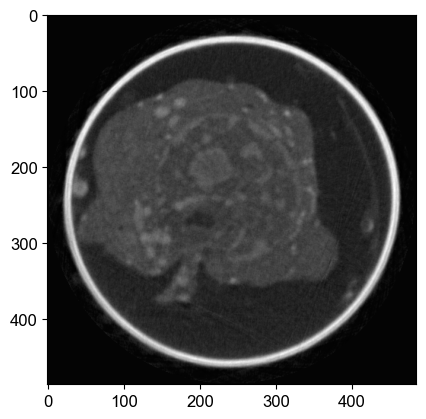

In [63]:
LAC_9905_8 = openmrc(Glu_9905_8_class.LACFile) * (Glu_9905_8_class.LACfactor)
LAC_9905_8.shape

plt.imshow(LAC_9905_8[:,196,:], cmap = "gray")

plt.show()

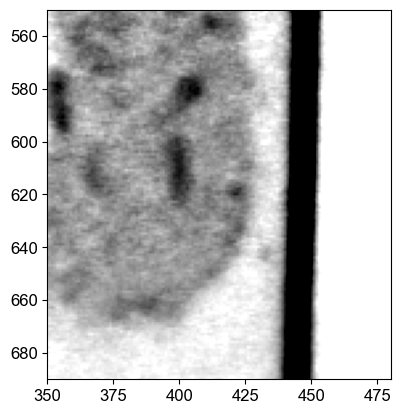

In [171]:
plt.imshow(
    (LAC_9905_8[:,:,194]).T, 
        cmap = "gray_r",
        vmin = 0.1, vmax = 0.4)

plt.xlim(350,480)
plt.ylim(690, 550)
#plt.gca().invert_yaxis()


plt.show()

#421.958333	620.025000	196.175000	
#x and y values are reversed, so we use transpose on the data file!

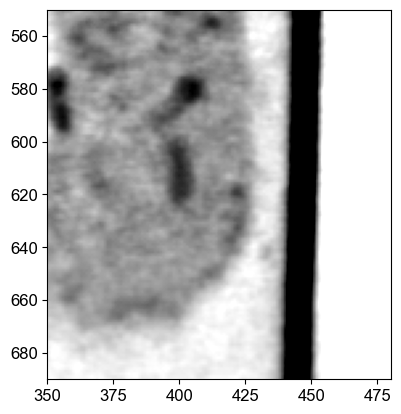

In [196]:
filtered_LAC_9905_8_z196 = cv2.bilateralFilter(LAC_9905_8[:,:,195], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_z196).T, 
           cmap = "gray_r", vmin = vmin_LAC, vmax = vmax_LAC)
plt.xlim(350,480)
plt.ylim(690, 550)

plt.show()

In [94]:
Ves_9905_8 = openmrc(Glu_9905_8_class.vesicles)
Ves_9905_8.shape

(486, 845, 485)

In [303]:
Mito_9905_8 = openmrc(Glu_9905_8_class.mitochondria)
Mito_9905_8.shape

(486, 845, 485)

**Subpop 1**

(640.0, 600.0)

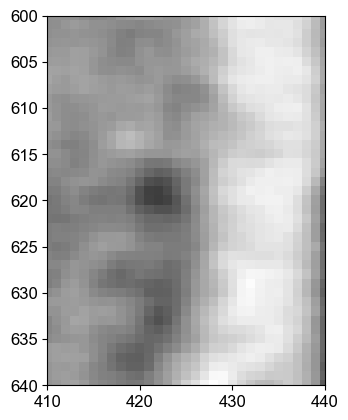

In [645]:
plt.imshow(
    (filtered_LAC_9905_8_z196).T, 
    #(LAC_9905_8[:,:,194]).T, 
    cmap = "gray_r", 
    vmin = vmin_LAC, vmax = vmax_LAC
    )
plt.xlim(410,440)
plt.ylim(640, 600)

#subpopulation #1, #1046

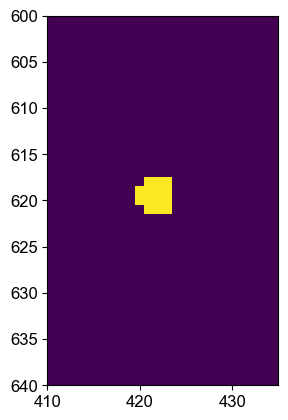

In [630]:
plt.imshow((Ves_9905_8[:,:,194]).T)
plt.xlim(410,435)
plt.ylim(640, 600)
plt.show()

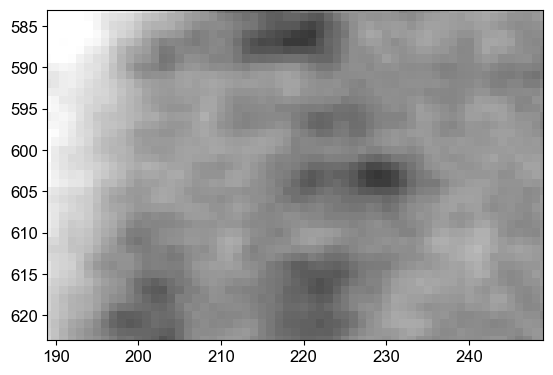

In [435]:
filtered_LAC_9905_8_z405 = cv2.bilateralFilter(LAC_9905_8[:,:,round(405)], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow(
    #(LAC_9905_8[:,:,379]).T,
    (filtered_LAC_9905_8_z405).T, 
    cmap = "gray_r", 
    vmin = vmin_LAC, vmax = vmax_LAC
          )

plt.xlim(229-40,229+20)
plt.ylim(603+20, 603-20)

plt.show()
#subpop 1, #510

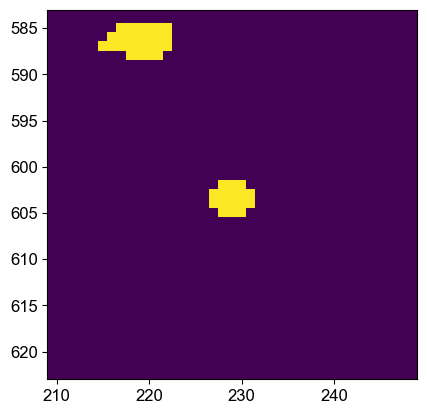

In [416]:
plt.imshow((Ves_9905_8[:,:,405]).T)
plt.xlim(229-20,229+20)
plt.ylim(603+20, 603-20)
plt.show()

In [434]:
Subpop1_Glu8 = Subpop_Glu8[Subpop_Glu8["clustInd"] == 1]
#Subpop1_Glu8
Select_Subpop1_Glu8 = Subpop1_Glu8[
    (Subpop1_Glu8["LAC.Value"] <= 0.30) &
    (Subpop1_Glu8["Min.Distance.to.PM.EDT"] <= 0.01)
]
Select_Subpop1_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
1,2,54.559140,783.301075,287.473118,2,0.287937,0.328090,0.260057,0.015165,0.383624,...,0.275451,0.297589,0.002614,159.364025,0.329220,0.00942,0.169563,Cell 8,Glucose,1
46,47,88.345455,658.754545,327.145455,47,0.285536,0.320729,0.253239,0.013564,0.470006,...,0.277056,0.292008,0.003092,202.170865,0.515867,0.00942,0.272045,Cell 8,Glucose,1
52,53,93.508725,624.689933,327.931544,53,0.291991,0.408161,0.227255,0.031856,1.224102,...,0.269849,0.304539,0.020939,384.850549,1.863365,0.00942,0.188638,Cell 8,Glucose,1
60,61,93.938776,652.653061,333.734694,61,0.280458,0.306019,0.256307,0.011255,0.206842,...,0.271150,0.289083,0.001377,110.496844,0.155817,0.00942,0.273995,Cell 8,Glucose,1
72,73,98.404255,637.595745,338.000000,73,0.295852,0.359167,0.255405,0.022027,0.577631,...,0.279582,0.308601,0.001321,100.393045,0.128432,0.00942,0.226083,Cell 8,Glucose,1
76,77,103.050000,473.783333,257.000000,77,0.297954,0.320883,0.271247,0.012248,-0.210685,...,0.289933,0.307631,0.001686,126.487311,0.213798,0.00942,0.100137,Cell 8,Glucose,1
100,101,111.677778,451.122222,231.622222,101,0.295612,0.335925,0.268290,0.015637,0.475414,...,0.282715,0.307708,0.002530,141.124622,0.252590,0.00000,0.121370,Cell 8,Glucose,1
101,102,110.214286,821.500000,287.285714,102,0.295349,0.323868,0.268631,0.015018,0.081165,...,0.283501,0.304974,0.000787,91.213135,0.104550,0.00942,0.092778,Cell 8,Glucose,1
124,125,116.750000,823.138889,292.222222,125,0.293147,0.323944,0.262516,0.014611,-0.078600,...,0.283748,0.300522,0.001012,87.701403,0.103170,0.00942,0.138767,Cell 8,Glucose,1
125,126,117.250000,440.022727,237.590909,126,0.261769,0.286742,0.243430,0.010899,0.526909,...,0.254496,0.267549,0.001237,100.393045,0.128432,0.00942,0.153638,Cell 8,Glucose,1


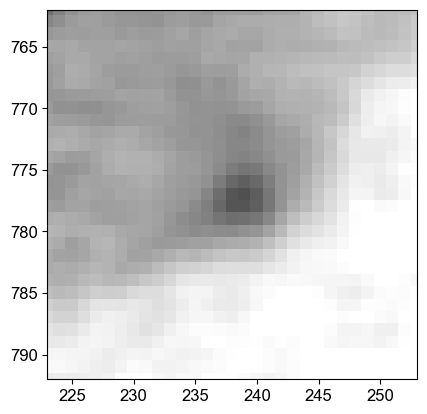

In [463]:
# 238.593220	777.067797	277.067797	
filtered_LAC_9905_8_z277 = cv2.bilateralFilter(LAC_9905_8[:,:,round(276)], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow(
    #(LAC_9905_8[:,:,276]).T,
    (filtered_LAC_9905_8_z277).T, 
    cmap = "gray_r", 
    vmin = vmin_LAC, vmax = vmax_LAC
          )

plt.xlim(238-15,238+15)
plt.ylim(777+15, 777-15)

plt.show()
#subpop 1, #549

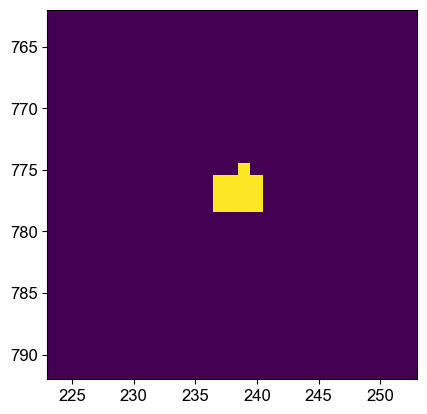

In [464]:
plt.imshow((Ves_9905_8[:,:,276]).T)
plt.xlim(238-15,238+15)
plt.ylim(777+15, 777-15)
plt.show()

**Subpop 2**

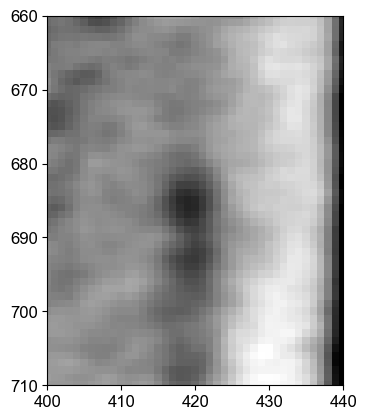

In [715]:
filtered_LAC_9905_8_z287 = cv2.bilateralFilter(LAC_9905_8[:,:,288], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_z287).T, 
           cmap = "gray_r", 
           vmin = vmin_LAC, vmax = 0.4
          )
plt.xlim(400,440)
plt.ylim(710, 660)

plt.show()

#419.238806	685.641791	287.626866
#subpopulation 2, 1042

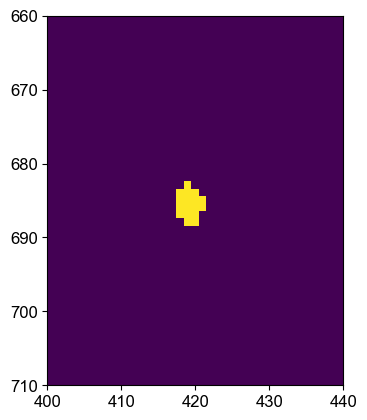

In [420]:
plt.imshow((Ves_9905_8[:,:,288]).T)
plt.xlim(400,440)
plt.ylim(710, 660)
plt.show()

In [466]:
Subpop2_Glu8 = Subpop_Glu8[Subpop_Glu8["clustInd"] == 2]
#Subpop1_Glu8
Select_Subpop2_Glu8 = Subpop2_Glu8[
    (Subpop2_Glu8["LAC.Value"] >= 0.30) &
    (Subpop2_Glu8["Min.Distance.to.PM.EDT"] >= 0.04)
]
Select_Subpop2_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
11,12,64.704545,743.886364,209.659091,12,0.324579,0.356237,0.291457,0.014895,0.061119,...,0.314436,0.335254,0.001237,94.473472,0.124627,0.128128,0.060318,Cell 8,Glucose,2
43,44,86.028986,763.285024,209.357488,44,0.367999,0.424743,0.328787,0.020703,0.550379,...,0.352997,0.383471,0.005818,202.170865,0.515867,0.307997,0.219309,Cell 8,Glucose,2
44,45,85.131148,794.442623,222.409836,45,0.365643,0.402149,0.322097,0.018864,-0.163808,...,0.352147,0.380742,0.001715,119.029116,0.184425,0.166925,0.416195,Cell 8,Glucose,2
51,52,88.250000,792.812500,274.598214,52,0.360698,0.403996,0.310311,0.021689,0.098916,...,0.346358,0.376383,0.003148,141.124622,0.252590,0.186033,0.121004,Cell 8,Glucose,2
55,56,91.300000,587.216667,251.550000,56,0.349940,0.412485,0.292726,0.026322,0.262347,...,0.331362,0.369130,0.003373,157.874555,0.326191,0.216663,0.140357,Cell 8,Glucose,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1020,395.029557,564.443350,203.477833,1020,0.374407,0.444314,0.322491,0.026337,0.310119,...,0.354522,0.393886,0.005706,232.991618,0.738832,0.275770,0.113433,Cell 8,Glucose,2
1024,1025,398.322581,537.279570,156.768817,1025,0.367428,0.417666,0.323704,0.021335,0.298186,...,0.349860,0.380940,0.005228,188.946945,0.461799,0.074174,0.179972,Cell 8,Glucose,2
1031,1032,404.662921,623.011236,228.870787,1032,0.327707,0.363194,0.286961,0.016570,-0.153974,...,0.316058,0.339682,0.005003,170.388527,0.421050,0.244561,0.047101,Cell 8,Glucose,2
1036,1037,412.225225,555.351351,195.693694,1037,0.354179,0.393171,0.318636,0.017090,0.080153,...,0.341126,0.367621,0.003120,157.874555,0.326191,0.116521,0.175983,Cell 8,Glucose,2


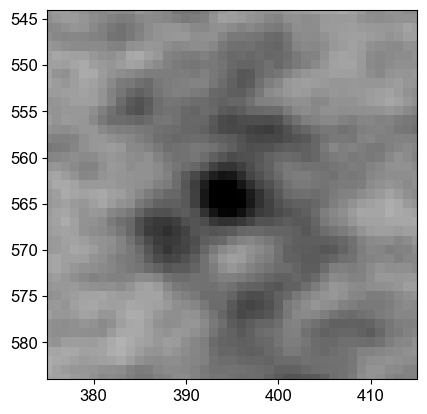

In [480]:
filtered_LAC_9905_8_z203 = cv2.bilateralFilter(LAC_9905_8[:,:,203], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_z203).T, 
           cmap = "gray_r", 
           vmin = vmin_LAC, vmax = 0.4
          )
plt.xlim(395 - 20,395 + 20)
plt.ylim(564 + 20, 564 - 20)


plt.show()
#395.029557	564.443350	203.477833
#Subpop 2, 1020

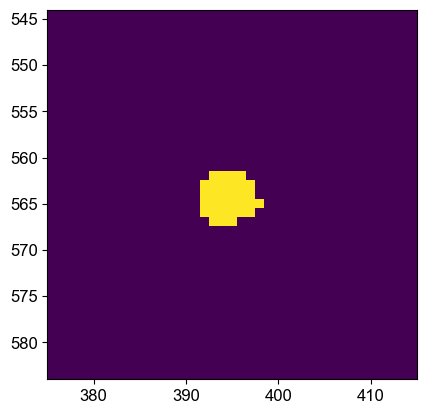

In [481]:
plt.imshow((Ves_9905_8[:,:,203]).T)
plt.xlim(395 - 20,395 + 20)
plt.ylim(564 + 20, 564 - 20)
plt.show()

In [521]:
Subpop2_Glu8 = Subpop_Glu8[Subpop_Glu8["clustInd"] == 2]
#Subpop1_Glu8
Select_Subpop2_Glu8 = Subpop2_Glu8[
    (Subpop2_Glu8["LAC.Value"] >= 0.30) &
    (Subpop2_Glu8["Min.Distance.to.PM.EDT"] >= 0.04) &
    (Subpop2_Glu8["Mito.Dist.EDT"] <= 0.03)
]
Select_Subpop2_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
63,64,95.646341,804.304878,274.439024,64,0.304865,0.333240,0.270706,0.013388,-0.155050,...,0.294599,0.313537,0.002305,149.967289,0.288947,0.128128,0.009420,Cell 8,Glucose,2
115,116,115.888889,521.277778,253.500000,116,0.314458,0.359931,0.244316,0.024899,-0.365944,...,0.295160,0.329489,0.001518,149.967289,0.288947,0.281503,0.009420,Cell 8,Glucose,2
142,143,124.606557,660.704918,303.786885,143,0.315837,0.359124,0.270592,0.020360,0.342178,...,0.300951,0.330916,0.001715,119.029116,0.184425,0.405941,0.026644,Cell 8,Glucose,2
188,189,138.732143,695.053571,331.607143,189,0.344544,0.381955,0.300810,0.016472,-0.246772,...,0.334645,0.358754,0.001574,110.496844,0.155817,0.347398,0.009420,Cell 8,Glucose,2
210,211,145.787879,446.727273,261.363636,211,0.329183,0.370784,0.290481,0.017754,0.083546,...,0.317238,0.340466,0.001855,121.617513,0.185867,0.224903,0.009420,Cell 8,Glucose,2
216,217,150.191176,444.691176,249.308824,217,0.329231,0.357219,0.292056,0.016082,-0.295003,...,0.318725,0.341384,0.001911,133.156556,0.243682,0.269916,0.009420,Cell 8,Glucose,2
218,219,148.656863,776.686275,224.068627,219,0.306462,0.354817,0.241605,0.022402,0.081323,...,0.290191,0.322666,0.002867,161.547365,0.329836,0.266109,0.026644,Cell 8,Glucose,2
229,230,152.373913,635.000000,355.886957,230,0.344907,0.410622,0.297524,0.026913,0.459175,...,0.325514,0.361604,0.003232,159.364025,0.329220,0.219714,0.009420,Cell 8,Glucose,2
234,235,153.156250,564.812500,267.104167,235,0.364177,0.457401,0.307398,0.035666,0.605929,...,0.338129,0.388054,0.002698,149.967289,0.288947,0.670552,0.009420,Cell 8,Glucose,2
252,253,159.033175,529.526066,314.165877,253,0.326511,0.422817,0.268361,0.030132,0.567904,...,0.304620,0.342786,0.005930,229.842697,0.795598,0.350196,0.009420,Cell 8,Glucose,2


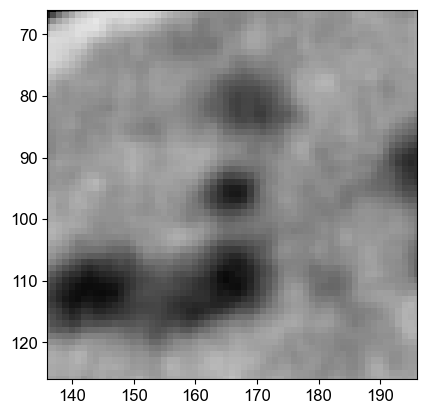

In [598]:
filtered_LAC_9905_8_y717 = cv2.bilateralFilter(LAC_9905_8[:,717,:], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_y717).T, 
           cmap = "gray_r", 
           vmin = vmin_LAC, vmax = 0.4
          )

plt.xlim(166 - 30,166 + 30)
plt.ylim(96 + 30, 96 - 30)

plt.show()
#166.065789	717.217105	96.013158	
#Subpop 2, 	282	

#ok: 772, 189, 
#not work: 116, 143


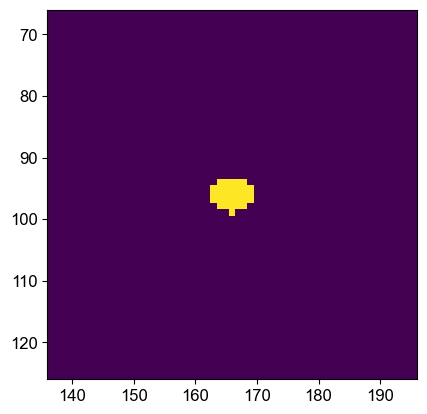

In [595]:
plt.imshow((Ves_9905_8[:,717,:]).T)

plt.xlim(166 - 30,166 + 30)
plt.ylim(96 + 30, 96 - 30)


plt.show()

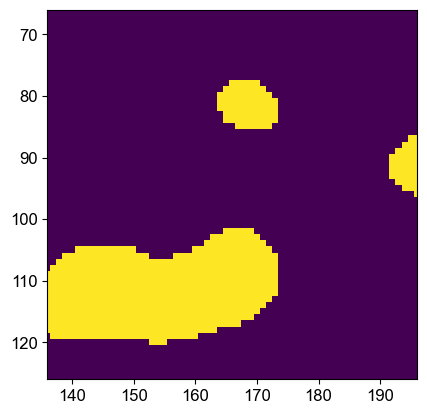

In [596]:
plt.imshow((Mito_9905_8[:,717,:]).T)

plt.xlim(166 - 30,166 + 30)
plt.ylim(96 + 30, 96 - 30)

plt.show()

**Subpop 3**

In [220]:
Subpop3_Glu8 = Subpop_Glu8[Subpop_Glu8["clustInd"] == 3]
Subpop3_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
8,9,65.056452,746.470430,271.494624,9,0.447495,0.586706,0.344090,0.055049,0.524223,...,0.402009,0.489106,0.010456,241.961521,0.741967,0.094671,0.071120,Cell 8,Glucose,3
23,24,76.503899,647.608187,216.947368,24,0.392388,0.463273,0.321923,0.027665,-0.045721,...,0.369960,0.415064,0.028837,344.290468,1.491550,0.084781,0.060318,Cell 8,Glucose,3
40,41,88.057665,686.869198,198.348805,41,0.341880,0.402150,0.286708,0.025673,0.080493,...,0.322189,0.361712,0.019984,344.290468,1.491550,0.182177,0.009420,Cell 8,Glucose,3
54,55,93.573643,815.662791,246.620155,55,0.355894,0.491103,0.275820,0.042725,0.854437,...,0.323165,0.379415,0.014503,320.926244,1.394947,0.028260,0.164785,Cell 8,Glucose,3
62,63,97.275862,704.282759,212.148276,63,0.432064,0.569189,0.341939,0.051876,0.585280,...,0.389255,0.469607,0.008151,232.645933,0.682362,0.359820,0.084781,Cell 8,Glucose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,953,370.443820,616.544944,326.831461,953,0.409478,0.548117,0.332667,0.046524,0.790846,...,0.371854,0.436278,0.010006,251.650123,0.805190,0.159030,0.114987,Cell 8,Glucose,3
991,992,382.652482,540.014184,141.535461,992,0.377076,0.447498,0.305559,0.030854,0.159087,...,0.356271,0.396090,0.007926,245.742780,0.796138,0.086849,0.159309,Cell 8,Glucose,3
992,993,381.932011,573.980170,238.524079,993,0.366370,0.466912,0.287154,0.033620,0.422473,...,0.340616,0.388176,0.009922,262.016989,0.870092,0.392606,0.085303,Cell 8,Glucose,3
1001,1002,384.939271,693.062753,222.663968,1002,0.389754,0.509213,0.314248,0.045318,0.627100,...,0.351324,0.418407,0.013885,270.474927,0.935052,0.060318,0.088869,Cell 8,Glucose,3


Text(0.5, 1.0, 'LAC Mean Values of ISGs in Class 3')

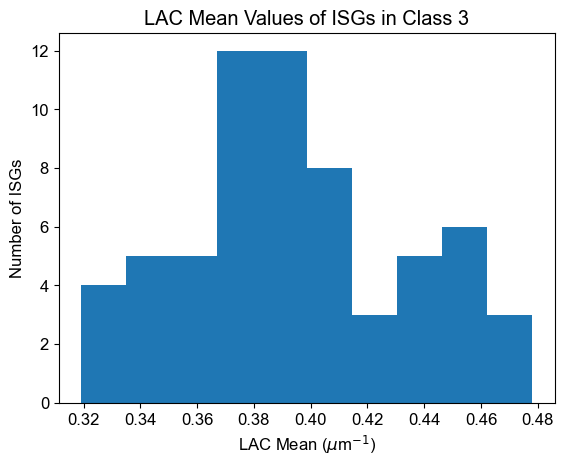

In [1084]:
plt.hist(Subpop3_Glu8["LAC.Value"], bins = 10)
plt.xlabel(r"LAC Mean ($\mu$m$^{-1}$)")
plt.ylabel("Number of ISGs")
plt.title("LAC Mean Values of ISGs in Class 3")
#plt.savefig("ISG_Subpop3_LACMean.png", dpi=500, bbox_inches='tight')


(array([15., 17., 12.,  6.,  5.,  5.,  0.,  1.,  1.,  1.]),
 array([0.00942014, 0.04448475, 0.07954936, 0.11461397, 0.14967858,
        0.1847432 , 0.21980781, 0.25487242, 0.28993703, 0.32500164,
        0.36006625]),
 <BarContainer object of 10 artists>)

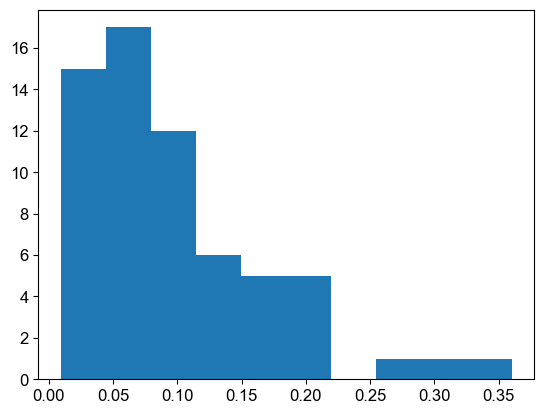

In [292]:
plt.hist(Subpop3_Glu8["Mito.Dist.EDT"])

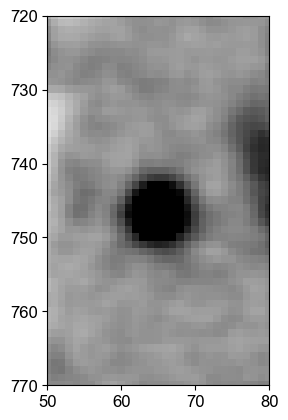

In [625]:
filtered_LAC_9905_8_z271 = cv2.bilateralFilter(LAC_9905_8[:,:,271], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_z271).T, 
           cmap = "gray_r", 
           vmin = vmin_LAC, vmax = 0.4
          )

plt.xlim(50,80)
plt.ylim(770, 720)

plt.show()

#subpopulation 3, #9
#65.056452	746.470430	271.494624

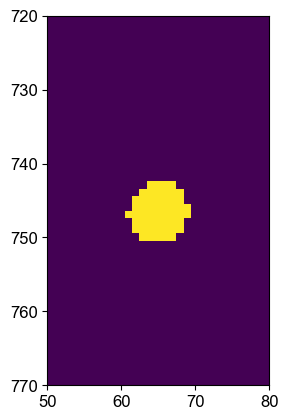

In [225]:
plt.imshow((Ves_9905_8[:,:,271]).T)
plt.xlim(50,80)
plt.ylim(770, 720)
plt.show()

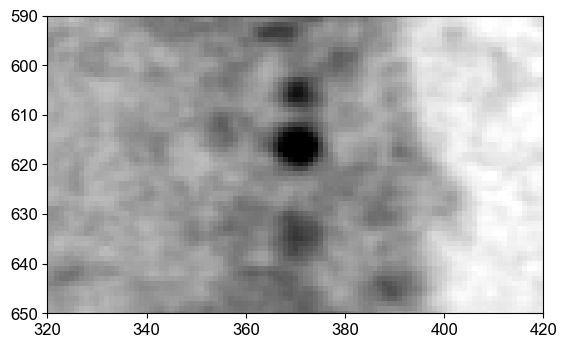

In [610]:
filtered_LAC_9905_8_z326 = cv2.bilateralFilter(LAC_9905_8[:,:,326], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow((filtered_LAC_9905_8_z326).T, 
           cmap = "gray_r", 
          vmin = vmin_LAC, vmax = 0.4
          )

plt.xlim(320,420)
plt.ylim(650, 590)

plt.show()
#370.443820	616.544944	326.831461	
#subpopulation 3, #953

#Not use this one, other ISG present

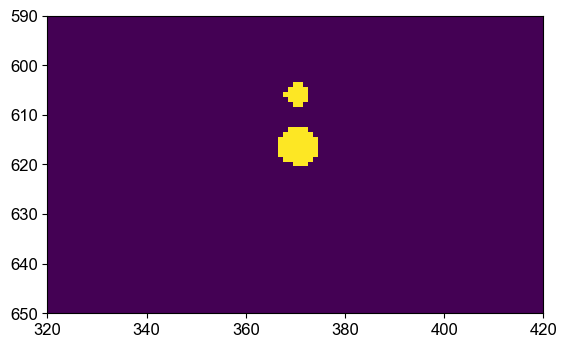

In [245]:
plt.imshow((Ves_9905_8[:,:,326]).T)

plt.xlim(320,420)
plt.ylim(650, 590)
plt.show()

In [297]:
Select_Subpop3_Glu8 = Subpop3_Glu8[Subpop3_Glu8["Mito.Dist.EDT"] <= 0.01]
Select_Subpop3_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
40,41,88.057665,686.869198,198.348805,41,0.341880,0.402150,0.286708,0.025673,0.080493,...,0.322189,0.361712,0.019984,344.290468,1.491550,0.182177,0.00942,Cell 8,Glucose,3
170,171,134.947452,788.791401,267.614650,171,0.446438,0.687664,0.292105,0.087568,0.620212,...,0.373326,0.510597,0.017651,313.858351,1.239851,0.217072,0.00942,Cell 8,Glucose,3
339,340,186.402778,674.513889,86.706597,340,0.411639,0.586094,0.317233,0.058785,0.912811,...,0.364274,0.445080,0.016189,301.179135,1.155892,0.219309,0.00942,Cell 8,Glucose,3
504,505,232.159712,670.657554,109.964029,505,0.381731,0.465084,0.303305,0.031439,0.223402,...,0.356785,0.406282,0.019534,344.290468,1.491550,0.273509,0.00942,Cell 8,Glucose,3
863,864,343.325088,729.966431,312.703180,864,0.447258,0.635074,0.322932,0.066493,0.490555,...,0.391497,0.496198,0.031817,374.718160,1.766481,0.419910,0.00942,Cell 8,Glucose,3
938,939,368.370444,689.094102,331.988734,939,0.424769,0.598462,0.306708,0.068166,0.549469,...,0.368081,0.474418,0.042413,425.661295,2.276870,0.154502,0.00942,Cell 8,Glucose,3
1025,1026,399.720117,653.758017,268.163265,1026,0.319209,0.378846,0.283441,0.018058,0.754150,...,0.305936,0.330214,0.009641,433.778808,2.526981,0.236256,0.00942,Cell 8,Glucose,3


In [602]:
Select_Subpop3_Glu8 = Subpop3_Glu8[Subpop3_Glu8["LAC.Max"] >= 0.7]
Select_Subpop3_Glu8

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
92,93,112.679198,615.106099,151.180451,93,0.478051,0.808349,0.313390,0.100938,0.902003,...,0.396418,0.538386,0.033644,373.848742,1.765332,0.170085,0.050729,Cell 8,Glucose,3
319,320,180.672131,480.521077,105.850117,320,0.432036,0.700321,0.292757,0.080468,1.055988,...,0.371585,0.473452,0.024003,379.851924,1.855603,0.139087,0.119899,Cell 8,Glucose,3


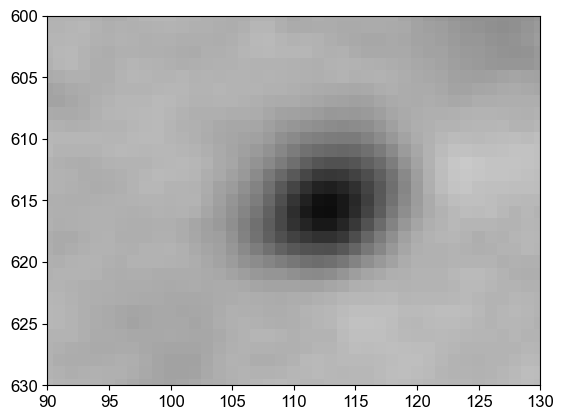

In [607]:
#high LAC Max
filtered_LAC_9905_8_z151 = cv2.bilateralFilter(LAC_9905_8[:,:,151], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow(
    #(LAC_9905_8[:,:,151]).T,
    (filtered_LAC_9905_8_z151).T, 
    cmap = "gray_r", 
    #vmin = vmin_LAC, vmax = vmax_LAC
          )

plt.xlim(90,130)
plt.ylim(630, 600)

plt.show()

#subpopulation 3, #93

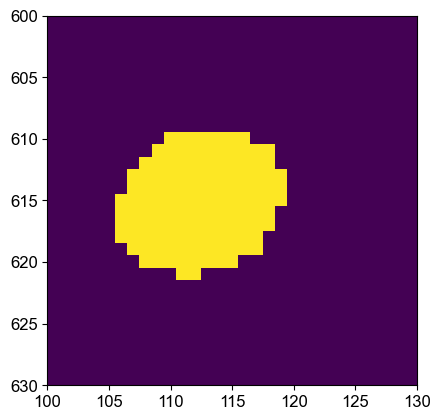

In [260]:
plt.imshow((Ves_9905_8[:,:,151]).T)

plt.xlim(100,130)
plt.ylim(630, 600)
plt.show()

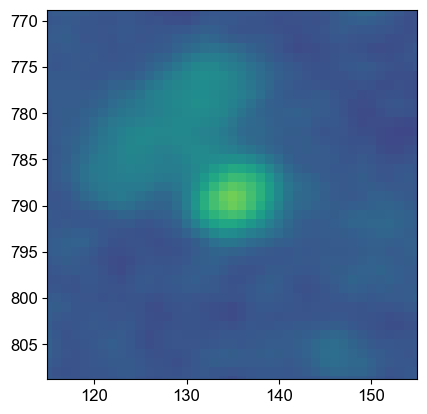

In [472]:
#low mito dist
#134.947452	788.791401 267.614650
X = 134.947452
Y = 788.791401
Z = 267.614650
filtered_LAC_9905_8_z267 = cv2.bilateralFilter(LAC_9905_8[:,:,round(Z)], d=3, sigmaColor=20, sigmaSpace=20)
plt.imshow(
    #(LAC_9905_8[:,:,267]).T,
    (filtered_LAC_9905_8_z267).T, 
    cmap = "viridis", 
    #vmin = vmin_LAC, vmax = vmax_LAC
          )

plt.xlim(X-20,X+20)
plt.ylim(Y+20, Y-20)

plt.show()

#subpop 3, #171

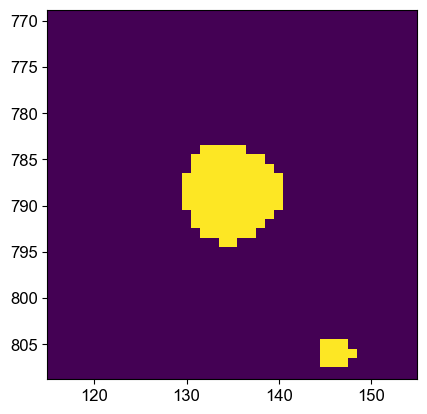

In [335]:
plt.imshow((Ves_9905_8[:,:,round(Z)]).T)

plt.xlim(X-20,X+20)
plt.ylim(Y+20, Y-20)
plt.show()

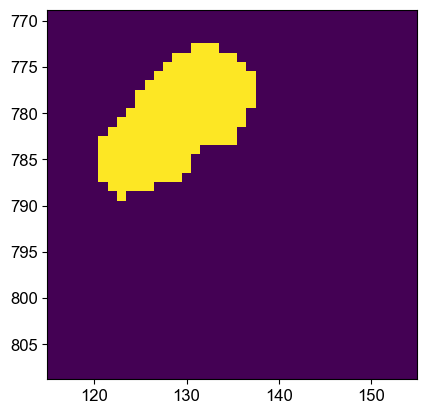

In [336]:
plt.imshow((Mito_9905_8[:,:,round(Z)]).T)

plt.xlim(X-20,X+20)
plt.ylim(Y+20, Y-20)
plt.show()

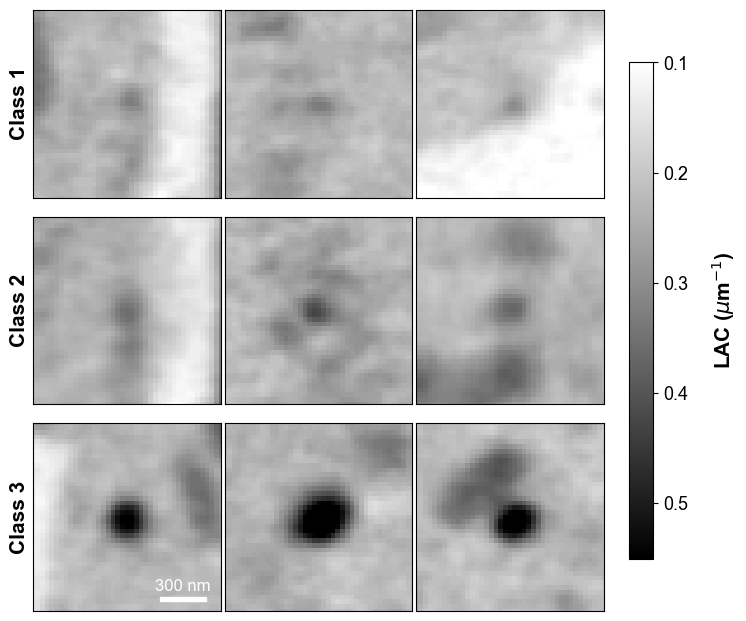

In [1075]:
# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

#Label rows 
row_labels = ["Class 1", "Class 2", "Class 3"]

# Reduce spacing between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)  # adjust horizontal and vertical spacing

# Add row labels to the left of each row
for i, label in enumerate(row_labels):
    axs[i, 0].set_ylabel(label, fontsize=15, 
                         rotation= 90, 
                         labelpad=10, 
                         va='center', 
                         weight = "bold")

#LAC min and max. Expansion amount too
vmin_LAC = 0.1
vmax_LAC = 0.4
expd = 20

#graph settings, using dictionary and unpacking 
#imshow_sett = dict(cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
vmin_alt = 0.1
vmax_alt = 0.55
imshow_sett = dict(cmap="gray_r", vmin=vmin_alt, vmax=vmax_alt)

#PLOT: row, column nomenclature

###Subpopulation 1 (0,...)
#1046, close to membrane 
axs[0,0].imshow((filtered_LAC_9905_8_z196).T, **imshow_sett) 
axs[0,0].set_xlim(421-expd,421+expd)
axs[0,0].set_ylim(620+expd, 620-expd)
#510, interior
axs[0,1].imshow((filtered_LAC_9905_8_z405).T, **imshow_sett) 
axs[0,1].set_xlim(229-expd,229+expd)
axs[0,1].set_ylim(603+expd, 603-expd)
#549, close to membrane 
axs[0,2].imshow((filtered_LAC_9905_8_z277).T, **imshow_sett) 
axs[0,2].set_xlim(238-expd,238+expd)
axs[0,2].set_ylim(777+expd, 777-expd)

###Subpopulation 2 (1, ...)
#1042, close to membrane 
axs[1,0].imshow((filtered_LAC_9905_8_z287).T, **imshow_sett) 
axs[1,0].set_xlim(419-expd,419+expd)
axs[1,0].set_ylim(685+expd, 685-expd)
#1020, interior
axs[1,1].imshow((filtered_LAC_9905_8_z203).T, **imshow_sett) 
axs[1,1].set_xlim(395-expd,395+expd)
axs[1,1].set_ylim(564+expd, 564-expd)
#282, close to mito
axs[1,2].imshow((filtered_LAC_9905_8_y717).T, **imshow_sett) 
axs[1,2].set_xlim(166-expd,166+expd)
axs[1,2].set_ylim(96+expd, 96-expd)

###Subpopulation 3 (2, ...)
#9, close to membrane 
axs[2,0].imshow((filtered_LAC_9905_8_z271).T, **imshow_sett) 
axs[2,0].set_xlim(65-expd,65+expd)
axs[2,0].set_ylim(746+expd, 746-expd)
#93, high max LAC dist
axs[2,1].imshow((filtered_LAC_9905_8_z151).T, **imshow_sett) 
axs[2,1].set_xlim(112-expd,112+expd)
axs[2,1].set_ylim(615+expd, 615-expd)
#171, low mito dist
axs[2,2].imshow((filtered_LAC_9905_8_z267).T, **imshow_sett) 
axs[2,2].set_xlim(134-expd,134+expd)
axs[2,2].set_ylim(788+expd, 788-expd)

#Add in colorbar than spans subplots
#im_cbar = ax.imshow(filtered_LAC_9905_8_z196, cmap="gray_r", vmin=vmin_LAC, vmax=vmax_LAC)
im_cbar = ax.imshow(filtered_LAC_9905_8_z196, cmap="gray_r", vmin=vmin_alt, vmax=vmax_alt)

cbar = fig.colorbar(im_cbar, ax=axs, orientation='vertical', fraction=0.04, pad=0.04)
cbar.set_label(r"LAC ($\mu$m$^{-1}$)", labelpad=15, fontsize = 15, weight = 'bold')
cbar.ax.invert_yaxis()
cbar.ax.tick_params(labelsize = 13)
#cbar.set_ticks(np.linspace(0.1, 0.4, 4))

# Loop through all subplots and remove ticks
for ax_row in axs:
    for ax in ax_row:
        #no tick marks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #ax.set_aspect("auto") 

#Scale bar
# Add scale bar to each subplot
scale_pixel_length_gallery = 9.86  # number of pixels corresponding to 500 nm
scale_label_gallery = '300 nm'
fontprops_gallery = fm.FontProperties(size=12)

scalebar_gallery = AnchoredSizeBar(axs[2,0].transData,
                           scale_pixel_length_gallery,
                           scale_label_gallery,
                           'lower right',
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.8,
                           fontproperties=fontprops_gallery,
                           label_top=True)
axs[2,0].add_artist(scalebar_gallery)

#fig.savefig("ISG_Gallery_Fig2.png", dpi=1500, bbox_inches='tight')
fig.savefig("ISG_Gallery_SupplStdDev.png", dpi=1500, bbox_inches='tight')

plt.show()

In [748]:
tmp_ves = Subpop_Glu8[Subpop_Glu8["Group"] == 1046]
tmp_ves

,Unnamed: 0,Centroid.X,Centroid.Y,Centroid.Z,Group,LAC.Value,LAC.Max,LAC.Min,LAC.Std.Dev,LAC.Skew,...,LAC.25th.Quantile,LAC.75th.Quantile,Volume..um3.,Geometric.Diameter..nm.,Ellipsoid.Surface.Area..um2.,Min.Distance.to.PM.EDT,Mito.Dist.EDT,Cell,Condition,clustInd
1045,1046,421.958333,620.025,196.175,1046,0.313995,0.367675,0.283393,0.015352,0.489735,...,0.302218,0.323613,0.003373,170.388527,0.42105,0.065941,0.132553,Cell 8,Glucose,1


(640.0, 600.0)

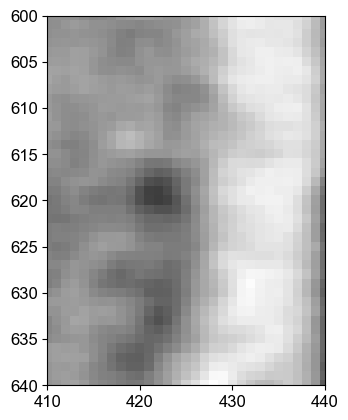

In [749]:
plt.imshow(
    (filtered_LAC_9905_8_z196).T, 
    #(LAC_9905_8[:,:,194]).T, 
    cmap = "gray_r", 
    vmin = vmin_LAC, vmax = vmax_LAC
    )
plt.xlim(410,440)
plt.ylim(640, 600)

#subpopulation #1, #1046

# Unormalized Vesicle Analysis (Legac)

In [589]:
#Create unnormalized vesicle parameters 

In [6]:
#Performing Vesicle Analysis. Will take a while! 

Unnorm_VesNS_7_22 = NS_7_22_class.Ves_Analysis_unnorm()
Unnorm_VesNS_6_5 = NS_6_5_class.Ves_Analysis_unnorm()
Unnorm_VesNS_1537_16_18 = NS_1537_16_18_class.Ves_Analysis_unnorm()
Unnorm_VesNS_7_8_9 = NS_7_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesNS_6_17_19 = NS_6_17_19_class.Ves_Analysis_unnorm()
Unnorm_VesNS_1537_19 = NS_1537_19_class.Ves_Analysis_unnorm()

NameError: name 'NS_7_22_class' is not defined

In [580]:
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"
Unnorm_VesNS_7_22["Cell"] = cell1
Unnorm_VesNS_6_10["Cell"] = cell2 
Unnorm_VesNS_6_5["Cell"] = cell3 
Unnorm_VesNS_1537_16_18["Cell"] = cell4
Unnorm_VesNS_7_8_9["Cell"] = cell5 
Unnorm_VesNS_6_17_19["Cell"] = cell6 
Unnorm_VesNS_1537_19["Cell"] = cell7 

In [590]:
Unnorm_Ves_df = pd.concat([Unnorm_VesNS_7_22, Unnorm_VesNS_6_10, Unnorm_VesNS_6_5, Unnorm_VesNS_1537_16_18, 
                           Unnorm_VesNS_7_8_9, Unnorm_VesNS_6_17_19, Unnorm_VesNS_1537_19])
Unnorm_Ves_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
0,0.349779,0.020459,0.159612,-0.607521,173.087257,0.025813,-0.367835,Cell 1
1,0.322191,0.023362,0.397413,-0.173769,198.135448,0.023564,-0.398836,Cell 1
2,0.278407,0.013413,0.011086,0.630050,129.279009,0.029806,-0.385776,Cell 1
3,0.299589,0.018291,-0.055561,-0.038416,207.333430,0.025813,-0.423415,Cell 1
4,0.339127,0.019948,0.229311,-0.332529,159.414727,0.042152,-0.367664,Cell 1
...,...,...,...,...,...,...,...,...
812,0.341419,0.022494,-0.616688,0.706583,147.987523,0.010315,-0.495643,Cell 7
813,0.335910,0.016570,-0.379847,-0.189990,139.261591,0.016309,-0.485552,Cell 7
814,0.373556,0.026402,-0.337575,-0.132086,235.890315,0.021881,-0.636997,Cell 7
815,0.348780,0.019457,0.059488,-0.191630,165.552006,0.023065,-0.437003,Cell 7


In [591]:
#Save files as excel

UnnormNSsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_df.to_csv(UnnormNSsavepath + '/Unorm_NS_vesicles.csv', index = False)


In [28]:
#-------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesNS_7_22 = NS_7_22_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_10 = NS_6_10_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_5 = NS_6_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_16_18 = NS_1537_16_18_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_7_8_9 = NS_7_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_17_19 = NS_6_17_19_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_19 = NS_1537_19_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"
Raw_Unnorm_VesNS_7_22["Cell"] = cell1
Raw_Unnorm_VesNS_6_10["Cell"] = cell2 
Raw_Unnorm_VesNS_6_5["Cell"] = cell3 
Raw_Unnorm_VesNS_1537_16_18["Cell"] = cell4
Raw_Unnorm_VesNS_7_8_9["Cell"] = cell5 
Raw_Unnorm_VesNS_6_17_19["Cell"] = cell6 
Raw_Unnorm_VesNS_1537_19["Cell"] = cell7 

#Combine raw distance ves files
Raw_Unnorm_Ves_df = pd.concat([Raw_Unnorm_VesNS_7_22, Raw_Unnorm_VesNS_6_10, Raw_Unnorm_VesNS_6_5, Raw_Unnorm_VesNS_1537_16_18, 
                           Raw_Unnorm_VesNS_7_8_9, Raw_Unnorm_VesNS_6_17_19, Raw_Unnorm_VesNS_1537_19])
Raw_Unnorm_Ves_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,0.349779,0.020459,0.159612,-0.607521,173.087257,73.492041,935.882026,Cell 1
1,0.322191,0.023362,0.397413,-0.173769,198.135448,67.088748,851.789353,Cell 1
2,0.278407,0.013413,0.011086,0.630050,129.279009,84.861300,886.485851,Cell 1
3,0.299589,0.018291,-0.055561,-0.038416,207.333430,73.492041,789.255712,Cell 1
4,0.339127,0.019948,0.229311,-0.332529,159.414727,120.012001,936.362828,Cell 1
...,...,...,...,...,...,...,...,...
812,0.341419,0.022494,-0.616688,0.706583,147.987523,42.430650,902.586796,Cell 7
813,0.335910,0.016570,-0.379847,-0.189990,139.261591,67.088748,933.474299,Cell 7
814,0.373556,0.026402,-0.337575,-0.132086,235.890315,90.009001,537.547941,Cell 7
815,0.348780,0.019457,0.059488,-0.191630,165.552006,94.877818,1092.537741,Cell 7


In [85]:
#XYZ Coordinates as Well. Function in other file altered

Raw_Unnorm_VesNS_7_22_XYZ = NS_7_22_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_10_XYZ = NS_6_10_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_5_XYZ = NS_6_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_16_18_XYZ = NS_1537_16_18_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_7_8_9_XYZ = NS_7_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_6_17_19_XYZ = NS_6_17_19_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesNS_1537_19_XYZ = NS_1537_19_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"
Raw_Unnorm_VesNS_7_22_XYZ["Cell"] = cell1
Raw_Unnorm_VesNS_6_10_XYZ["Cell"] = cell2 
Raw_Unnorm_VesNS_6_5_XYZ["Cell"] = cell3 
Raw_Unnorm_VesNS_1537_16_18_XYZ["Cell"] = cell4
Raw_Unnorm_VesNS_7_8_9_XYZ["Cell"] = cell5 
Raw_Unnorm_VesNS_6_17_19_XYZ["Cell"] = cell6 
Raw_Unnorm_VesNS_1537_19_XYZ["Cell"] = cell7 

#Combine raw distance ves files
Raw_Unnorm_Ves_df_XYZ = pd.concat([Raw_Unnorm_VesNS_7_22_XYZ, Raw_Unnorm_VesNS_6_10_XYZ, Raw_Unnorm_VesNS_6_5_XYZ, Raw_Unnorm_VesNS_1537_16_18_XYZ, 
                           Raw_Unnorm_VesNS_7_8_9_XYZ, Raw_Unnorm_VesNS_6_17_19_XYZ, Raw_Unnorm_VesNS_1537_19_XYZ])
Raw_Unnorm_Ves_df_XYZ

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,Centroid X,Centroid Y,Centroid Z,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,48.910714,384.250000,229.500000,0.349779,0.020459,0.159612,-0.607521,173.087257,73.492041,935.882026,Cell 1
1,49.347826,416.076087,252.125000,0.322191,0.023362,0.397413,-0.173769,198.135448,67.088748,851.789353,Cell 1
2,51.742424,455.893939,238.515152,0.278407,0.013413,0.011086,0.630050,129.279009,84.861300,886.485851,Cell 1
3,52.241573,461.089888,218.522472,0.299589,0.018291,-0.055561,-0.038416,207.333430,73.492041,789.255712,Cell 1
4,53.133929,390.500000,222.785714,0.339127,0.019948,0.229311,-0.332529,159.414727,120.012001,936.362828,Cell 1
...,...,...,...,...,...,...,...,...,...,...,...
812,398.714286,374.100000,277.442857,0.341419,0.022494,-0.616688,0.706583,147.987523,42.430650,902.586796,Cell 7
813,400.057143,372.114286,266.342857,0.335910,0.016570,-0.379847,-0.189990,139.261591,67.088748,933.474299,Cell 7
814,401.348000,400.024000,264.264000,0.373556,0.026402,-0.337575,-0.132086,235.890315,90.009001,537.547941,Cell 7
815,403.783019,404.886792,233.028302,0.348780,0.019457,0.059488,-0.191630,165.552006,94.877818,1092.537741,Cell 7


In [41]:
Raw_UnnormNSsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_df["Condition"] = "No_Stim"
Raw_Unnorm_Ves_df.to_csv(Raw_UnnormNSsavepath + '/Raw_Unorm_NS_vesicles.csv', index = False)

In [88]:
Raw_Unnorm_Ves_df_XYZ.to_csv(Raw_UnnormNSsavepath + '/Raw_Unorm_NS_vesicles_XYZ.csv', index = False)

**For Glucose**

In [596]:
Unnorm_VesGlu_9905_7 = Glu_9905_7_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_8 = Glu_9905_8_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_11_12 = Glu_9905_11_12_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_8_9 = Glu_9905_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_3 = Glu_9905_3_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9908_4_5 = Glu_9908_4_5_class.Ves_Analysis_unnorm()
Unnorm_VesGlu_9905_12_13 = Glu_9905_12_13_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [597]:
Unnorm_VesGlu_9905_7["Cell"] = cell1
Unnorm_VesGlu_9905_8["Cell"] = cell2 
Unnorm_VesGlu_9905_11_12["Cell"] = cell3 
Unnorm_VesGlu_9905_8_9["Cell"] = cell4
Unnorm_VesGlu_9905_3["Cell"] = cell5 
Unnorm_VesGlu_9908_4_5["Cell"] = cell6 
Unnorm_VesGlu_9905_12_13["Cell"] = cell7 

In [598]:
Unnorm_Ves_Glu_df = pd.concat([Unnorm_VesGlu_9905_7, Unnorm_VesGlu_9905_8, Unnorm_VesGlu_9905_11_12, Unnorm_VesGlu_9905_8_9, 
                           Unnorm_VesGlu_9905_3, Unnorm_VesGlu_9908_4_5, Unnorm_VesGlu_9905_12_13])
Unnorm_Ves_Glu_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
0,0.345842,0.021504,0.456026,-0.486163,108.145129,0.066811,-0.407127,Cell 1
1,0.310798,0.020862,0.239564,-0.038784,131.008494,0.034274,-0.381115,Cell 1
2,0.379432,0.017529,0.026026,-0.466432,119.029116,0.032515,-0.444922,Cell 1
4,0.382397,0.020683,0.336051,-0.246396,131.008494,0.026548,-0.441929,Cell 1
5,0.318752,0.020295,-0.125400,0.196663,141.124622,0.053096,-0.424686,Cell 1
...,...,...,...,...,...,...,...,...
508,0.303010,0.017148,0.371583,-0.324349,131.008494,0.125473,-0.828636,Cell 7
509,0.294144,0.014205,-0.055105,-0.730946,131.008494,0.025264,-0.530765,Cell 7
510,0.265486,0.011676,-0.256746,-0.320137,141.124622,0.023819,-0.673588,Cell 7
511,0.314405,0.011799,-0.444917,0.024376,152.021891,0.025264,-0.486411,Cell 7


In [599]:
UnnormGlusavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_Glu_df.to_csv(UnnormGlusavepath + '/Unorm_Glu_vesicles.csv', index = False)

In [49]:
#----------------------------------------------
#Raw Distances Analysis

Raw_Unnorm_VesGlu_9905_7 = Glu_9905_7_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8 = Glu_9905_8_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_11_12 = Glu_9905_11_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8_9 = Glu_9905_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_3 = Glu_9905_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9908_4_5 = Glu_9908_4_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_12_13 = Glu_9905_12_13_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell8 = "Cell 8"
cell9 = "Cell 9"
cell10 = "Cell 10"
cell11 = "Cell 11"
cell12 = "Cell 12"
cell13 = "Cell 13"
cell14 = "Cell 14"
Raw_Unnorm_VesGlu_9905_7["Cell"] = cell8
Raw_Unnorm_VesGlu_9905_8["Cell"] = cell9 
Raw_Unnorm_VesGlu_9905_11_12["Cell"] = cell10 
Raw_Unnorm_VesGlu_9905_8_9["Cell"] = cell11
Raw_Unnorm_VesGlu_9905_3["Cell"] = cell12 
Raw_Unnorm_VesGlu_9908_4_5["Cell"] = cell13 
Raw_Unnorm_VesGlu_9905_12_13["Cell"] = cell14 

#Combine raw distance ves files
Raw_Unnorm_VesGlu_df = pd.concat([Raw_Unnorm_VesGlu_9905_7, Raw_Unnorm_VesGlu_9905_8, Raw_Unnorm_VesGlu_9905_11_12, Raw_Unnorm_VesGlu_9905_8_9, 
                           Raw_Unnorm_VesGlu_9905_3, Raw_Unnorm_VesGlu_9908_4_5, Raw_Unnorm_VesGlu_9905_12_13])
Raw_Unnorm_VesGlu_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,0.345842,0.021504,0.456026,-0.486163,108.145129,187.425175,818.098148,Cell 8
1,0.310798,0.020862,0.239564,-0.038784,131.008494,96.147086,885.910750,Cell 8
2,0.379432,0.017529,0.026026,-0.466432,119.029116,91.213135,726.531052,Cell 8
4,0.382397,0.020683,0.336051,-0.246396,131.008494,74.475213,733.495779,Cell 8
5,0.318752,0.020295,-0.125400,0.196663,141.124622,148.950425,774.566081,Cell 8
...,...,...,...,...,...,...,...,...
508,0.303010,0.017148,0.371583,-0.324349,131.008494,453.015033,174.659855,Cell 14
509,0.294144,0.014205,-0.055105,-0.730946,131.008494,91.213135,702.597751,Cell 14
510,0.265486,0.011676,-0.256746,-0.320137,141.124622,85.996568,404.503943,Cell 14
511,0.314405,0.011799,-0.444917,0.024376,152.021891,91.213135,816.967397,Cell 14


In [50]:
Raw_UnnormGlusavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesGlu_df["Condition"] = "Glucose"
Raw_Unnorm_VesGlu_df.to_csv(Raw_UnnormGlusavepath + '/Raw_Unorm_Glu_vesicles.csv', index = False)

In [7]:
#XYZ Coordinates as Well. Function in other file altered

Raw_Unnorm_VesGlu_9905_7_XYZ = Glu_9905_7_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8_XYZ = Glu_9905_8_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_11_12_XYZ = Glu_9905_11_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_8_9_XYZ = Glu_9905_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_3_XYZ = Glu_9905_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9908_4_5_XYZ = Glu_9908_4_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGlu_9905_12_13_XYZ = Glu_9905_12_13_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"
Raw_Unnorm_VesGlu_9905_7_XYZ["Cell"] = cell1
Raw_Unnorm_VesGlu_9905_8_XYZ["Cell"] = cell2 
Raw_Unnorm_VesGlu_9905_11_12_XYZ["Cell"] = cell3 
Raw_Unnorm_VesGlu_9905_8_9_XYZ["Cell"] = cell4
Raw_Unnorm_VesGlu_9905_3_XYZ["Cell"] = cell5 
Raw_Unnorm_VesGlu_9908_4_5_XYZ["Cell"] = cell6 
Raw_Unnorm_VesGlu_9905_12_13_XYZ["Cell"] = cell7 

#Combine raw distance ves files
GluRaw_Unnorm_Ves_df_XYZ = pd.concat([Raw_Unnorm_VesGlu_9905_7_XYZ, Raw_Unnorm_VesGlu_9905_8_XYZ, Raw_Unnorm_VesGlu_9905_11_12_XYZ, Raw_Unnorm_VesGlu_9905_8_9_XYZ, 
                           Raw_Unnorm_VesGlu_9905_3_XYZ, Raw_Unnorm_VesGlu_9908_4_5_XYZ, Raw_Unnorm_VesGlu_9905_12_13_XYZ])
GluRaw_Unnorm_Ves_df_XYZ

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,Centroid X,Centroid Y,Centroid Z,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,81.671875,234.656250,220.406250,0.345842,0.021504,0.456026,-0.486163,108.145129,187.425175,818.098148,Cell 1
1,84.155172,241.034483,210.000000,0.310798,0.020862,0.239564,-0.038784,131.008494,96.147086,885.910750,Cell 1
2,85.607143,243.821429,253.160714,0.379432,0.017529,0.026026,-0.466432,119.029116,91.213135,726.531052,Cell 1
4,86.809524,219.071429,240.476190,0.382397,0.020683,0.336051,-0.246396,131.008494,74.475213,733.495779,Cell 1
5,88.537313,264.761194,228.492537,0.318752,0.020295,-0.125400,0.196663,141.124622,148.950425,774.566081,Cell 1
...,...,...,...,...,...,...,...,...,...,...,...
508,352.802469,189.777778,256.049383,0.303010,0.017148,0.371583,-0.324349,131.008494,453.015033,174.659855,Cell 7
509,351.862069,253.620690,261.241379,0.294144,0.014205,-0.055105,-0.730946,131.008494,91.213135,702.597751,Cell 7
510,353.581081,206.256757,226.729730,0.265486,0.011676,-0.256746,-0.320137,141.124622,85.996568,404.503943,Cell 7
511,356.852273,214.397727,267.454545,0.314405,0.011799,-0.444917,0.024376,152.021891,91.213135,816.967397,Cell 7


In [9]:
Raw_UnnormGlusavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
GluRaw_Unnorm_Ves_df_XYZ.to_csv(Raw_UnnormGlusavepath + '/GluRaw_Unorm_NS_vesicles_XYZ.csv', index = False)

**For GIP**

In [34]:
Unnorm_VesGIP_2220_4 = GIP_2220_4_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_5 = GIP_2220_5_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_12_13 = GIP_2220_12_13_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2220_9 = GIP_2220_9_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2216_6_7 = GIP_2216_6_7_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_2216_3_5 = GIP_2216_3_5_class.Ves_Analysis_unnorm()
Unnorm_VesGIP_1532_15_17 = GIP_1532_15_17_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [35]:
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"

Unnorm_VesGIP_2220_4["Cell"] = cell1
Unnorm_VesGIP_2220_5["Cell"] = cell2 
Unnorm_VesGIP_2220_12_13["Cell"] = cell3 
Unnorm_VesGIP_2220_9["Cell"] = cell4
Unnorm_VesGIP_2216_6_7["Cell"] = cell5 
Unnorm_VesGIP_2216_3_5["Cell"] = cell6 
Unnorm_VesGIP_1532_15_17["Cell"] = cell7 

In [36]:
Unnorm_Ves_GIP_df = pd.concat([Unnorm_VesGIP_2220_4, Unnorm_VesGIP_2220_5, Unnorm_VesGIP_2220_12_13, Unnorm_VesGIP_2220_9, 
                           Unnorm_VesGIP_2216_6_7, Unnorm_VesGIP_2216_3_5, Unnorm_VesGIP_1532_15_17])
Unnorm_Ves_GIP_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
0,0.369061,0.017300,-0.531242,-0.885824,129.279009,0.000000,-0.683762,Cell 1
3,0.352864,0.014969,-0.016175,-0.113006,117.457775,0.014928,-0.716650,Cell 1
6,0.360470,0.013837,-0.123775,0.222734,120.012001,0.000000,-0.742958,Cell 1
10,0.361428,0.019665,-0.096391,-0.811983,117.457775,0.014928,-0.529454,Cell 1
13,0.387220,0.019717,-0.026913,0.294609,129.279009,0.007464,-0.690454,Cell 1
...,...,...,...,...,...,...,...,...
1966,0.356434,0.011943,-0.223184,-0.580188,108.145129,0.022584,-0.659502,Cell 7
1967,0.357968,0.017939,0.095329,-0.852052,152.021891,0.000000,-0.667247,Cell 7
1968,0.367433,0.018389,-0.096609,-0.630072,131.008494,0.013039,-0.670765,Cell 7
1969,0.370637,0.021656,0.304604,-0.393165,110.496844,0.023805,-0.637540,Cell 7


In [37]:
UnnormGIPsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_GIP_df.to_csv(UnnormGIPsavepath + '/Unorm_GIP_vesicles.csv', index = False)

In [54]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGIP_2220_4 = GIP_2220_4_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_5 = GIP_2220_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_12_13 = GIP_2220_12_13_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2220_9 = GIP_2220_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2216_6_7 = GIP_2216_6_7_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_2216_3_5 = GIP_2216_3_5_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGIP_1532_15_17 = GIP_1532_15_17_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell15 = "Cell 15"
cell16 = "Cell 16"
cell17 = "Cell 17"
cell18 = "Cell 18"
cell19 = "Cell 19"
cell20 = "Cell 20"
cell21 = "Cell 21"
Raw_Unnorm_VesGIP_2220_4["Cell"] = cell15
Raw_Unnorm_VesGIP_2220_5["Cell"] = cell16 
Raw_Unnorm_VesGIP_2220_12_13["Cell"] = cell17 
Raw_Unnorm_VesGIP_2220_9["Cell"] = cell18
Raw_Unnorm_VesGIP_2216_6_7["Cell"] = cell19 
Raw_Unnorm_VesGIP_2216_3_5["Cell"] = cell20 
Raw_Unnorm_VesGIP_1532_15_17["Cell"] = cell21 

#Combine raw distance ves files
Raw_Unnorm_VesGIP_df = pd.concat([Raw_Unnorm_VesGIP_2220_4, Raw_Unnorm_VesGIP_2220_5, Raw_Unnorm_VesGIP_2220_12_13, Raw_Unnorm_VesGIP_2220_9, 
                           Raw_Unnorm_VesGIP_2216_6_7, Raw_Unnorm_VesGIP_2216_3_5, Raw_Unnorm_VesGIP_1532_15_17])
Raw_Unnorm_VesGIP_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,0.369061,0.017300,-0.531242,-0.885824,129.279009,0.000000,430.624065,Cell 15
3,0.352864,0.014969,-0.016175,-0.113006,117.457775,60.006001,369.901830,Cell 15
6,0.360470,0.013837,-0.123775,0.222734,120.012001,0.000000,324.532068,Cell 15
10,0.361428,0.019665,-0.096391,-0.811983,117.457775,60.006001,785.826634,Cell 15
13,0.387220,0.019717,-0.026913,0.294609,129.279009,30.003000,417.893438,Cell 15
...,...,...,...,...,...,...,...,...
1966,0.356434,0.011943,-0.223184,-0.580188,108.145129,91.213135,480.735430,Cell 21
1967,0.357968,0.017939,0.095329,-0.852052,152.021891,0.000000,465.097554,Cell 21
1968,0.367433,0.018389,-0.096609,-0.630072,131.008494,52.661928,458.088148,Cell 21
1969,0.370637,0.021656,0.304604,-0.393165,110.496844,96.147086,526.619279,Cell 21


In [55]:
Raw_UnnormGIPsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesGIP_df["Condition"] = "GIP"
Raw_Unnorm_VesGIP_df.to_csv(Raw_UnnormGIPsavepath + '/Raw_Unorm_GIP_vesicles.csv', index = False)

**For TAK**

In [12]:
Unnorm_VesTAK_9920_8_9 = TAK_9920_8_9_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9919_12_13 = TAK_9919_12_13_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9917_2 = TAK_9917_2_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_9917_1 = TAK_9917_1_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2213_4 = TAK_2213_4_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2213_11_12 = TAK_2213_11_12_class.Ves_Analysis_unnorm()
Unnorm_VesTAK_2211_9_11 = TAK_2211_9_11_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

In [13]:
Unnorm_VesTAK_9920_8_9["Cell"] = cell1
Unnorm_VesTAK_9919_12_13["Cell"] = cell2 
Unnorm_VesTAK_9917_2["Cell"] = cell3 
Unnorm_VesTAK_9917_1["Cell"] = cell4
Unnorm_VesTAK_2213_4["Cell"] = cell5 
Unnorm_VesTAK_2213_11_12["Cell"] = cell6 
Unnorm_VesTAK_2211_9_11["Cell"] = cell7 

In [14]:
Unnorm_Ves_TAK_df = pd.concat([Unnorm_VesTAK_9920_8_9, Unnorm_VesTAK_9919_12_13, Unnorm_VesTAK_9917_2, Unnorm_VesTAK_9917_1, 
                           Unnorm_VesTAK_2213_4, Unnorm_VesTAK_2213_11_12, Unnorm_VesTAK_2211_9_11])
Unnorm_Ves_TAK_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
0,0.326422,0.015161,0.238204,-0.059477,148.707001,0.044019,-0.413345,Cell 1
1,0.374682,0.019069,-0.095146,-0.257945,184.651199,0.036626,-0.229465,Cell 1
2,0.321701,0.019982,-0.136077,-0.068267,241.961521,0.036626,-0.407574,Cell 1
3,0.367724,0.021990,0.239040,-0.188476,163.673232,0.048835,-0.191709,Cell 1
4,0.357740,0.016634,0.194338,-0.009697,171.669692,0.036626,-0.352599,Cell 1
...,...,...,...,...,...,...,...,...
411,0.301451,0.019304,0.015818,-0.829105,139.261591,0.037594,-0.348108,Cell 7
412,0.324994,0.019810,0.760823,-0.191085,129.279009,0.025063,-0.504410,Cell 7
414,0.315974,0.021047,0.224827,-0.645840,139.261591,0.035444,-0.350081,Cell 7
415,0.307523,0.021919,0.128789,-0.852113,129.279009,0.025063,-0.413375,Cell 7


In [15]:
UnnormTAKsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_TAK_df.to_csv(UnnormTAKsavepath + '/Unorm_TAK_vesicles.csv', index = False)

In [58]:
#----------------------------------------------
#Raw Distances Analysis

Raw_Unnorm_VesTAK_9920_8_9 = TAK_9920_8_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9919_12_13 = TAK_9919_12_13_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9917_2 = TAK_9917_2_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_9917_1 = TAK_9917_1_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2213_4 = TAK_2213_4_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2213_11_12 = TAK_2213_11_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesTAK_2211_9_11 = TAK_2211_9_11_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell22 = "Cell 22"
cell23 = "Cell 23"
cell24 = "Cell 24"
cell25 = "Cell 25"
cell26 = "Cell 26"
cell27 = "Cell 27"
cell28 = "Cell 28"
Raw_Unnorm_VesTAK_9920_8_9["Cell"] = cell22
Raw_Unnorm_VesTAK_9919_12_13["Cell"] = cell23 
Raw_Unnorm_VesTAK_9917_2["Cell"] = cell24 
Raw_Unnorm_VesTAK_9917_1["Cell"] = cell25
Raw_Unnorm_VesTAK_2213_4["Cell"] = cell26 
Raw_Unnorm_VesTAK_2213_11_12["Cell"] = cell27 
Raw_Unnorm_VesTAK_2211_9_11["Cell"] = cell28 

#Combine raw distance ves files
Raw_Unnorm_VesTAK_df = pd.concat([Raw_Unnorm_VesTAK_9920_8_9, Raw_Unnorm_VesTAK_9919_12_13, Raw_Unnorm_VesTAK_9917_2, Raw_Unnorm_VesTAK_9917_1, 
                           Raw_Unnorm_VesTAK_2213_4, Raw_Unnorm_VesTAK_2213_11_12, Raw_Unnorm_VesTAK_2211_9_11])
Raw_Unnorm_VesTAK_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,0.326422,0.015161,0.238204,-0.059477,148.707001,109.624545,712.397356,Cell 22
1,0.374682,0.019069,-0.095146,-0.257945,184.651199,91.213135,1219.211776,Cell 22
2,0.321701,0.019982,-0.136077,-0.068267,241.961521,91.213135,725.257552,Cell 22
3,0.367724,0.021990,0.239040,-0.188476,163.673232,121.617513,1352.567736,Cell 22
4,0.357740,0.016634,0.194338,-0.009697,171.669692,91.213135,856.734740,Cell 22
...,...,...,...,...,...,...,...,...
411,0.301451,0.019304,0.015818,-0.829105,139.261591,90.009001,834.709136,Cell 28
412,0.324994,0.019810,0.760823,-0.191085,129.279009,60.006001,510.051005,Cell 28
414,0.315974,0.021047,0.224827,-0.645840,139.261591,84.861300,829.841985,Cell 28
415,0.307523,0.021919,0.128789,-0.852113,129.279009,60.006001,684.831216,Cell 28


In [59]:
Raw_UnnormTAKsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesTAK_df["Condition"] = "TAK"
Raw_Unnorm_VesTAK_df.to_csv(Raw_UnnormTAKsavepath + '/Raw_Unorm_TAK_vesicles.csv', index = False)

**For GKA**

In [70]:
#Unnormalized Analysis
Unnorm_VesGKA_9892_5_6 = GKA_9892_5_6_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9889_9 = GKA_9889_9_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9889_6 = GKA_9889_6_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9892_3 = GKA_9892_3_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9897_1 = GKA_9897_1_class.Ves_Analysis_unnorm()
Unnorm_VesGKA_9895_1 = GKA_9895_1_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarnin

In [75]:
cell1 = "Cell 1"
cell2 = "Cell 2"
cell3 = "Cell 3"
cell4 = "Cell 4"
cell5 = "Cell 5"
cell6 = "Cell 6"
cell7 = "Cell 7"

Unnorm_VesGKA_9892_5_6["Cell"] = cell1
Unnorm_VesGKA_9889_9["Cell"] = cell2 
Unnorm_VesGKA_9889_6["Cell"] = cell3 
Unnorm_VesGKA_9892_3["Cell"] = cell4
Unnorm_VesGKA_9897_1["Cell"] = cell5 
Unnorm_VesGKA_9895_1["Cell"] = cell6 

In [77]:
Unnorm_Ves_GKA_df = pd.concat([Unnorm_VesGKA_9892_5_6, Unnorm_VesGKA_9889_9, Unnorm_VesGKA_9889_6, Unnorm_VesGKA_9892_3, 
                           Unnorm_VesGKA_9897_1, Unnorm_VesGKA_9895_1])
Unnorm_Ves_GKA_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
0,0.316114,0.012881,0.464433,0.583515,100.393045,0.049319,-0.417358,Cell 1
1,0.376684,0.021033,0.501974,0.212452,119.029116,0.049319,-0.651117,Cell 1
4,0.361538,0.023521,-0.308898,-1.102190,100.393045,0.040893,-0.354444,Cell 1
5,0.357319,0.019454,-0.256196,-0.177104,119.029116,0.040893,-0.492232,Cell 1
7,0.336926,0.016353,0.168108,-0.464383,108.145129,0.049319,-0.512271,Cell 1
...,...,...,...,...,...,...,...,...
707,0.441218,0.037638,0.142746,-0.955505,222.517830,0.000000,0.063584,Cell 6
708,0.408502,0.017466,0.270621,-0.771320,110.496844,0.041980,0.029765,Cell 6
709,0.411834,0.015449,0.211756,-0.526354,131.008494,0.031290,0.078973,Cell 6
710,0.358765,0.017249,-0.382722,-0.721498,100.393045,0.027986,-0.141540,Cell 6


In [78]:
UnnormGKAsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_GKA_df.to_csv(UnnormGKAsavepath + '/Unorm_GKA_vesicles.csv', index = False)

In [60]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGKA_9892_5_6 = GKA_9892_5_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9889_9 = GKA_9889_9_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9889_6 = GKA_9889_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9892_3 = GKA_9892_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9897_1 = GKA_9897_1_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGKA_9895_1 = GKA_9895_1_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell29 = "Cell 29"
cell30 = "Cell 30"
cell31 = "Cell 31"
cell32 = "Cell 32"
cell33 = "Cell 33"
cell34 = "Cell 34"
Raw_Unnorm_VesGKA_9892_5_6["Cell"] = cell29
Raw_Unnorm_VesGKA_9889_9["Cell"] = cell30 
Raw_Unnorm_VesGKA_9889_6["Cell"] = cell31 
Raw_Unnorm_VesGKA_9892_3["Cell"] = cell32
Raw_Unnorm_VesGKA_9897_1["Cell"] = cell33 
Raw_Unnorm_VesGKA_9895_1["Cell"] = cell34 

#Combine raw distance ves files
Raw_Unnorm_VesGKA_df = pd.concat([Raw_Unnorm_VesGKA_9892_5_6, Raw_Unnorm_VesGKA_9889_9, Raw_Unnorm_VesGKA_9889_6, Raw_Unnorm_VesGKA_9892_3, 
                           Raw_Unnorm_VesGKA_9897_1, Raw_Unnorm_VesGKA_9895_1])
Raw_Unnorm_VesGKA_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
0,0.316114,0.012881,0.464433,0.583515,100.393045,121.617513,696.651823,Cell 29
1,0.376684,0.021033,0.501974,0.212452,119.029116,121.617513,304.043782,Cell 29
4,0.361538,0.023521,-0.308898,-1.102190,100.393045,100.839915,843.687256,Cell 29
5,0.357319,0.019454,-0.256196,-0.177104,119.029116,100.839915,547.278808,Cell 29
7,0.336926,0.016353,0.168108,-0.464383,108.145129,121.617513,511.480810,Cell 29
...,...,...,...,...,...,...,...,...
707,0.441218,0.037638,0.142746,-0.955505,222.517830,0.000000,3249.999068,Cell 34
708,0.408502,0.017466,0.270621,-0.771320,110.496844,128.994852,2983.504656,Cell 34
709,0.411834,0.015449,0.211756,-0.526354,131.008494,96.147086,3378.308165,Cell 34
710,0.358765,0.017249,-0.382722,-0.721498,100.393045,85.996568,1910.885541,Cell 34


In [61]:
Raw_UnnormGKAsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesGKA_df["Condition"] = "GKA"
Raw_Unnorm_VesGKA_df.to_csv(Raw_UnnormTAKsavepath + '/Raw_Unorm_GKA_vesicles.csv', index = False)

**For GLM**

In [22]:
#GLM Unnormalized Analysis
Unnorm_VesGLM_9929_10_11 = GLM_9929_10_11_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9928_6 = GLM_9928_6_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9930_8_10 = GLM_9930_8_10_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9929_3 = GLM_9929_3_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9929_12 = GLM_9929_12_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_9928_2_3 = GLM_9928_2_3_class.Ves_Analysis_unnorm()
Unnorm_VesGLM_1518_14 = GLM_1518_14_class.Ves_Analysis_unnorm()


C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, Runt

In [79]:
Unnorm_VesGLM_9929_10_11["Cell"] = cell1
Unnorm_VesGLM_9928_6["Cell"] = cell2 
Unnorm_VesGLM_9930_8_10["Cell"] = cell3 
Unnorm_VesGLM_9929_3["Cell"] = cell4
Unnorm_VesGLM_9929_12["Cell"] = cell5 
Unnorm_VesGLM_9928_2_3["Cell"] = cell6 
Unnorm_VesGLM_1518_14["Cell"] = cell7 

In [83]:
Unnorm_Ves_GLM_df = pd.concat([Unnorm_VesGLM_9929_10_11, Unnorm_VesGLM_9928_6, Unnorm_VesGLM_9930_8_10, Unnorm_VesGLM_9929_3, 
                           Unnorm_VesGLM_9929_12, Unnorm_VesGLM_9928_2_3, Unnorm_VesGLM_1518_14])
Unnorm_Ves_GLM_df

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Distance to PM EDT,Mito Dist EDT,Cell
1,0.273279,0.014909,-0.175146,-0.052456,148.223921,0.029432,-0.753335,Cell 1
2,0.301758,0.013164,0.436694,0.326153,180.305565,0.032906,-0.337648,Cell 1
3,0.281090,0.012292,0.301743,-0.798284,143.108622,0.029432,-0.498213,Cell 1
4,0.283418,0.009231,0.000504,-0.694282,113.585389,0.041624,-0.643121,Cell 1
5,0.294422,0.011828,0.176582,-0.433168,404.011108,0.029432,-0.325787,Cell 1
...,...,...,...,...,...,...,...,...
367,0.255815,0.021304,-0.068135,-0.180713,248.917525,0.024972,-0.736193,Cell 7
368,0.285625,0.018175,-0.278715,-0.672189,107.414680,0.046046,-0.380217,Cell 7
369,0.257048,0.020363,-0.140230,-0.019277,216.310988,0.024972,-0.772517,Cell 7
370,0.271491,0.020118,-0.562643,0.557977,127.354185,0.035316,-0.656005,Cell 7


In [84]:
UnnormGLMsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Unnorm"

Unnorm_Ves_GLM_df.to_csv(UnnormGLMsavepath + '/Unorm_GLM_vesicles.csv', index = False)

In [65]:
#----------------------------------------------
#Raw Distances Analysis
Raw_Unnorm_VesGLM_9929_10_11 = GLM_9929_10_11_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9928_6 = GLM_9928_6_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9930_8_10 = GLM_9930_8_10_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9929_3 = GLM_9929_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9929_12 = GLM_9929_12_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_9928_2_3 = GLM_9928_2_3_class.Ves_Analysis_Raw_Unorm()
Raw_Unnorm_VesGLM_1518_14 = GLM_1518_14_class.Ves_Analysis_Raw_Unorm()

#Assigning cell labels
cell35 = "Cell 35"
cell36 = "Cell 36"
cell37 = "Cell 37"
cell38 = "Cell 38"
cell39 = "Cell 39"
cell40 = "Cell 40"
cell41 = "Cell 41"
Raw_Unnorm_VesGLM_9929_10_11["Cell"] = cell35
Raw_Unnorm_VesGLM_9928_6["Cell"] = cell36 
Raw_Unnorm_VesGLM_9930_8_10["Cell"] = cell37 
Raw_Unnorm_VesGLM_9929_3["Cell"] = cell38
Raw_Unnorm_VesGLM_9929_12["Cell"] = cell39 
Raw_Unnorm_VesGLM_9928_2_3["Cell"] = cell40 
Raw_Unnorm_VesGLM_1518_14["Cell"] = cell41 

#Combine raw distance ves files
Raw_Unnorm_VesGLM_df = pd.concat([Raw_Unnorm_VesGLM_9929_10_11, Raw_Unnorm_VesGLM_9928_6, Raw_Unnorm_VesGLM_9930_8_10, Raw_Unnorm_VesGLM_9929_3, 
                           Raw_Unnorm_VesGLM_9929_12, Raw_Unnorm_VesGLM_9928_2_3, Raw_Unnorm_VesGLM_1518_14])
Raw_Unnorm_VesGLM_df

C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang42\AppData\Local\anaconda3\Lib\site-packages\mrcfile\mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
C:\Users\kchang

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell
1,0.273279,0.014909,-0.175146,-0.052456,148.223921,97.297115,252.785319,Cell 35
2,0.301758,0.013164,0.436694,0.326153,180.305565,108.781481,1188.658586,Cell 35
3,0.281090,0.012292,0.301743,-0.798284,143.108622,97.297115,719.110594,Cell 35
4,0.283418,0.009231,0.000504,-0.694282,113.585389,137.598899,421.308865,Cell 35
5,0.294422,0.011828,0.176582,-0.433168,404.011108,97.297115,1230.721969,Cell 35
...,...,...,...,...,...,...,...,...
367,0.255815,0.021304,-0.068135,-0.180713,248.917525,72.741314,243.438997,Cell 41
368,0.285625,0.018175,-0.278715,-0.672189,107.414680,134.128355,922.410337,Cell 41
369,0.257048,0.020363,-0.140230,-0.019277,216.310988,72.741314,200.533962,Cell 41
370,0.271491,0.020118,-0.562643,0.557977,127.354185,102.871752,351.875531,Cell 41


In [66]:
Raw_UnnormGLMsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_VesGLM_df["Condition"] = "GLM"
Raw_Unnorm_VesGLM_df.to_csv(Raw_UnnormGLMsavepath + '/Raw_Unorm_GLM_vesicles.csv', index = False)

**Combined RawUnormalized**

In [78]:
Raw_Unnorm_Ves_AllCond = pd.concat([Raw_Unnorm_Ves_df, Raw_Unnorm_VesGlu_df, Raw_Unnorm_VesGIP_df, Raw_Unnorm_VesTAK_df,
    Raw_Unnorm_VesGKA_df, Raw_Unnorm_VesGLM_df])
Raw_Unnorm_Ves_AllCond

,LAC Value,LAC Std Dev,LAC Skew,LAC Kurtosis,Geometric Diameter (nm),Min Raw Distance to PM EDT,Mito Raw Dist EDT,Cell,Condition
0,0.349779,0.020459,0.159612,-0.607521,173.087257,73.492041,935.882026,Cell 1,No_Stim
1,0.322191,0.023362,0.397413,-0.173769,198.135448,67.088748,851.789353,Cell 1,No_Stim
2,0.278407,0.013413,0.011086,0.630050,129.279009,84.861300,886.485851,Cell 1,No_Stim
3,0.299589,0.018291,-0.055561,-0.038416,207.333430,73.492041,789.255712,Cell 1,No_Stim
4,0.339127,0.019948,0.229311,-0.332529,159.414727,120.012001,936.362828,Cell 1,No_Stim
...,...,...,...,...,...,...,...,...,...
367,0.255815,0.021304,-0.068135,-0.180713,248.917525,72.741314,243.438997,Cell 41,GLM
368,0.285625,0.018175,-0.278715,-0.672189,107.414680,134.128355,922.410337,Cell 41,GLM
369,0.257048,0.020363,-0.140230,-0.019277,216.310988,72.741314,200.533962,Cell 41,GLM
370,0.271491,0.020118,-0.562643,0.557977,127.354185,102.871752,351.875531,Cell 41,GLM


In [79]:
Raw_UnnormALLsavepath = "D:/Downloads/Drug Stimulated INS1E Cells/CSV_files/Raw_Dist"
Raw_Unnorm_Ves_AllCond.to_csv(Raw_UnnormALLsavepath + '/Raw_Unorm_All_Cond_vesicles.csv', index = False)